Subjest
===
To make a complete ML procedures is possible now by "pycaret":


|Initialize| Model Training| Model Ensembling| Model Analysis  |Model Deployment   |
|---|---|---|---|---|
|[Getting Data](#Getting-Data)|[Compare Models](#Compare-Models)|[Ensembling Models](#Ensembling-Model)|[Plot Model](#Plot-Model)|[Predict Model](#Predict-Model)|
|[Setting up Environment](#Setting-up-Environment)|[Create Model](#Create-Model)   |[Blend Models](#Blend-Models)|[Interpret Model](#Interpret-Model)   |[Finalize Model](#Finalize-Model)   |
||[Tune Model](#Tune-Model)|[Stack Models](#Stack-Models)|[Assign Model](#Assign-Model)   |[Deploy Model](#Deploy-Model)   |   
||   |   |[Calibrate Model](#Calibrate-Model)   |[Save Model](#Sav3-Model)   |
||   |   |[Optimize Threshold](#Optimize-Threshold)|[Save Experiment](#Save-Experiment)   |

Getting Data
---
1. By Pandas,
```python
df = pd.read_csv('file.csv')
```

2. or Loading data from PyCaret’s repository
```python
from pycaret.datasets import get_data
data = get_data('bank') 
```

Setting up Environment
---

```python
from pycaret.classification import *
from pycaret.regression import *
from pycaret.clustering import *
from pycaret.anomaly import *
from pycaret.nlp import *

clf = setup(data = df, target = 'target')
```

Good Feature engineering gains better result; pycaret avails several functions in this stage, includeing:
1. feature engeering
   - feature_interaction = `True`, feature_ratio = `True`
- normalize = `False`/True, normailzes data;
- normalize_method = `zscore`, i.e.  z = (x - 𝞵)/𝞼, others include "minmax, maxabs, robust";
- pca = `False`;
- remove_outliers = `False`
- remove_multicollinearity = `False`; while enables, drop the co-linear feature which is less correlated with target; 
- multicollinearity_threshold = 0.9, accompanied with last one;
- feature_selection  = `False`
- feature_selection_threshold = 0.8
- transform_target = `False`
- transform_target_method = 'box-cox', for strictly positive input data, and 
 `yeo-johnson` supports both positive or negative data.

Compare Models
---
```python
compare_models()
```

Create Model
---
```python
xgboost = create_model('xgboost')
```

Tune Model
---
The more `n_iter` the higher the training effect: 
```python
tuned_lightgbm = tune_model('lightgbm')
tuned_rf = tune_model('rf', n_iter = 50, optimize = 'mae')
```

Ensembling Models
---
```python
# ensembling decision tree model (bagging)
dt_bagged = ensemble_model(dt)
# ensembling decision tree model (boosting)
dt_boosted = ensemble_model(dt, method = 'Boosting')
```

Blend Models
---
```python
blend_all = blend_models()
# blending specific models
blender = blend_models(estimator_list = [dt, catboost, lightgbm])
```

Stack Models
---
```python
stacker = stack_models(estimator_list = [ridge,lda,gbc], meta_model = xgboost)
# creating multiple layer stacking from specific models
stacknet = create_stacknet([[lightgbm, xgboost, ada], [et, gbr, catboost, rf]])
```

Plot Model
---
```python
plot_model(lr)
```

Interpret Model
---
```python
# summary
interpret_model(xgboost)
# interpreting model
interpret_model(xgboost, plot = 'correlation')
# interpreting model
interpret_model(xgboost, plot = 'reason', observation = 10)
```

Assign Model
---
```python
# Assign label
kmeans_results = assign_model(kmeans)
# Assign label
iforest_results = assign_model(iforest)
# Assign label
lda_results = assign_model(lda)
```

Calibrate Model
---
When performing Classification experiments you often want to predict not only the class labels, but also obtain a probability of the prediction. Calibrating classification models, in PyCaret, takes a trained model object and method of calibration through method parameter. 
```python
# calibrate a model
calibrated_dt = calibrate_model(dt)
```

Optimize Threshold
---
This function is only available in **pycaret.classification** module.
In Classification problems the cost of false positives are almost never same as cost of false negatives. As such, if you are optimizing a business problem where Type 1 and Type 2 errors have different impact, you can optimize your classifier for a probability threshold value to optimize the custom loss function simply by defining cost of true positives, true negatives, false positives and false negatives separately.
```python
# optimize threshold for trained model
optimize_threshold(xgboost, true_negative = 1500, false_negative = -5000)
```

Predict Model
---
```python
# predict on hold-out
xgboost = create_model('xgboost')
pred_xgb = predict_model(xgboost)
# unseen predict
lr = create_model('lr')
lr_final = finalize_model(lr)
data_unseen = pd.read_csv('data_unseen.csv') 
predictions = predict_model(lr_final, data = data_unseen)
```

Finalize Moswl
---
```python
# finalize a model
final_rf = finalize_model(rf)
```

Deploy Model
---
Once a model is finalized using finalize_model, it’s ready for deployment. A trained model can be consumed locally using save_model functionality which save the transformation pipeline and trained model which can be consumed by end user applications as a binary pickle file. Alternatively, models can be deployed on cloud using PyCaret. Deploying a model on cloud is as simple as writing deploy_model.
```python

```

Save Model
---
```python
# save a model
save_model(dt, 'dt_saved_07032020')
# Loading the saved model
dt_saved = load_model('dt_saved_07032020')

```

Save Experiment
---
Saving or logging an entire experiment in PyCaret is as simple as writing save_experiment. The function saves the entire environment including transformation pipeline, models created and all the intermediary outputs as a transferable binary pickle file for later use.
```python
# save a model
reg1 = setup(data = df, target = 'target')
# compare models
compare_models()
# create a model
xgboost = create_model('xgboost')
# blend models
blend_models()
#saving an experiment
save_experiment('experiment_07032020')

# Loading saved experiment
experiment_saved = load_experiment('experiment_07032020')
```

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext watermark
%watermark -v -p sklearn,plotly,pandas_ta,pycaret,lightgbm,xgboost,catboost,shap,altair,graphviz

CPython 3.6.9
IPython 7.14.0

sklearn 0.23.1
plotly 4.8.1
pandas_ta 0.1.39b0
pycaret n
lightgbm 2.3.1
xgboost 1.1.0
catboost 0.23.1
shap 0.35.0
altair 4.1.0
graphviz 0.14


In [4]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

In [5]:
import pandas_ta as ta

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor as lgb
from xgboost import XGBRegressor as xgb
from catboost import CatBoostRegressor as cgb
from vecstack import stacking
import xgboost 

In [6]:
from pycaret.regression import *

In [7]:
dir_name='../COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/'
url = dir_name+"/time_series_covid19_confirmed_global.csv"
df_confirmed = pd.read_csv(url)

In [8]:
def df_washing(df_,col="confirmed",country="Taiwan*"):
    """
    simple washing for df
    """
    df=df_.copy()
    
    # retrieve the data
    df_1 = df[df["Country/Region"] == country]

    ## structuring times eries data
    df_2 = pd.DataFrame(df_1[df_1.columns[4:]].sum(),columns=[col])
    df_2.index = pd.to_datetime(df_2.index)#,format='%m/%d/%y')
    return df_2

In [9]:
df_confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [10]:
country="Brazil"

df_confirmed2 = df_washing(df_confirmed,country=country)

## for cases of dead
df_dead = pd.read_csv(dir_name+"time_series_covid19_deaths_global.csv")
df_dead2 = df_washing(df_dead,col="dead",country=country)

### for cases of recovered
df_recovered = pd.read_csv(dir_name+"time_series_covid19_recovered_global.csv")
df_recovered2 = df_washing(df_recovered,col="recovered",country=country)

In [11]:
df_conf_dead = df_confirmed2.join(df_dead2,how = "inner")
df_all = df_conf_dead.join(df_recovered2,how = "inner")

In [12]:
df_all.tail()

,confirmed,dead,recovered
2020-05-24,363211,22666,149911
2020-05-25,374898,23473,153833
2020-05-26,391222,24512,158593
2020-05-27,411821,25598,166647
2020-05-28,438238,26754,177604


To make future prediction, we create a target, which is the increase of comfirmed of the next date:

In [12]:
def df_diff(df_):
    df=df_.copy()
    for name in df.columns.values:
        name1=name+'_diff'
        df[name1]=df[name]-df[name].shift()
    df.fillna(0,inplace=True)    
    return df    

In [13]:
def df_CRD_ratio(df_,denom='confirmed',num=['dead','recovered']):
    df=df_.copy()
    for name in num:
        f_=name+'_'+denom+'_ratio'
        df[f_]=df[name]/df[denom]
    df.fillna(888,inplace=True)    
    return df   


In [14]:
df_all.columns

Index(['confirmed', 'dead', 'recovered'], dtype='object')

In [15]:
df_all0=df_CRD_ratio(df_all)

In [16]:
df_all0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2020-01-22 to 2020-05-28
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   confirmed                  128 non-null    int64  
 1   dead                       128 non-null    int64  
 2   recovered                  128 non-null    int64  
 3   dead_confirmed_ratio       128 non-null    float64
 4   recovered_confirmed_ratio  128 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 6.0 KB


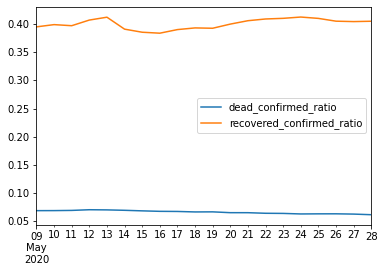

In [16]:
df_all0[['dead_confirmed_ratio','recovered_confirmed_ratio']].tail(20).plot()

In [17]:
df_all1=df_diff(df_all0)
df_all1.head()

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff
2020-01-22,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# resst the initial confirmed number
df_all1.loc['2020-01-22','confirmed_diff']=df_all1.loc['2020-01-22','confirmed']

In [18]:
df_all1.head()

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff
2020-01-22,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_all1['target']=df_all1['confirmed_diff'].shift(-1)
df_all1.head()

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff,target
2020-01-22,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,0.0


Technical Indicators
---

In [21]:
def ta_bbands(df_,item):
    df=df_[[item]].copy()
    df.ta.adjusted=item
    df[['BB_Lower','BB_Mid','BB_Upper']]=df.ta.bbands()
    df.plot()

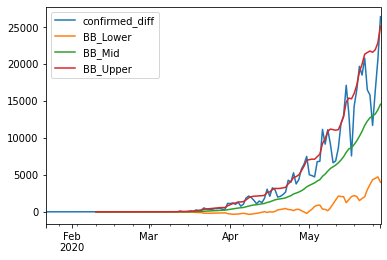

In [22]:
ta_bbands(df_all1,'confirmed_diff')

In [23]:
def get_technical_indicators(df,items):
    for item in items:
        # Create 7 and 21 days Moving Average
        df['ma7'] = df[item].rolling(window=7).mean()
        df['ma21'] = df[item].rolling(window=21).mean()
    
        # Create MACD
        #dataset['26ema'] = pd.ewma(dataset[item], span=26)
        #dataset['12ema'] = pd.ewma(dataset[item], span=12)
        #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
        df.ta.adjusted=item
        macd=item+'_macd'
        df[macd]=(df.ta.macd())['MACD_12_26_9']

        # Create Bollinger Bands
        BBands=[item+'_BB_lower',item+'_BB_mid',item+'_BB_upper']
        df[BBands]=df.ta.bbands()

        #df['20sd'] = pd.stats.moments.rolling_std(df[item],20)
        #df['upper_band'] = df['ma21'] + (df['20sd']*2)
        #df['lower_band'] = df['ma21'] - (df['20sd']*2)
    
        # Create Exponential moving average
        df['ema'] = df[item].ewm(com=0.5).mean()
    
        # Create Momentum
        df['momentum'] = df[item]-1
    
    return df

In [24]:
df_all3=get_technical_indicators(df_all1,['confirmed','recovered','dead'])

In [25]:
df_all3.iloc[24:30,:]

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff,...,ema,momentum,recovered_macd,recovered_BB_lower,recovered_BB_mid,recovered_BB_upper,dead_macd,dead_BB_lower,dead_BB_mid,dead_BB_upper
2020-02-15,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2020-02-16,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-19,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fourier transforms
---
take a function and create a series of sine waves (with different amplitudes and frames). When combined, these sine waves approximate the original function. Mathematically speaking, the transforms look like this:
$$G(f) = \int_{-\infty}^\infty g(t) e^{-i 2 \pi f t} dt$$

We will Fourier transforms to extract global and local trends in the target feature, and to also denoise it a little. 

In [26]:
def plot_fft(df_,features):
    df=df_.copy()
    #print(len(np.fft.fft(np.asarray(df[features].tolist()))))
    close_fft = np.fft.fft(np.asarray(df[features].tolist()))
    
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df[features]=df[features]
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9, 100]:
        fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
        plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
    plt.plot(df[features].values,  label='Real')
    plt.xlabel('Days')
    plt.ylabel(features)
    plt.title('Fourier transforms')
    plt.legend()
    print(len(np.fft.ifft(fft_list_m10)))

128


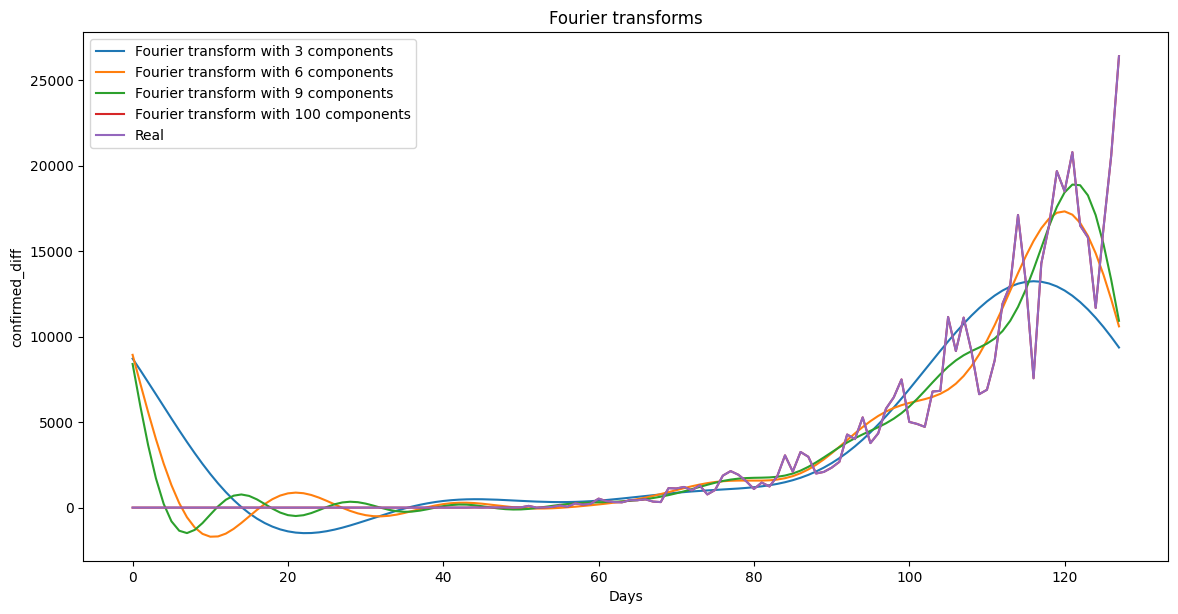

In [27]:
plot_fft(df_all3,'confirmed_diff')

As you see in Figure 3 the more components from the Fourier transform we use the closer the approximation function is to the real target feature (the 100 components transform is almost identical to the original function - the red and the purple lines almost overlap). We use Fourier transforms for the purpose of extracting *long*- and *short*-term trends so we will use the transforms with 3, 6, and 9 components. You can infer that the transform with 3 components serves as the long term trend.


In [28]:
def get_fft(df_,features):
    df=df_.copy()
    close_fft = np.fft.fft(np.asarray(df[features].tolist()))
    
    fft_df = pd.DataFrame({'fft':close_fft})
    fft_df[features]=df[features]
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
    
    #plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9, 100]:
        fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
        #plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
        fn=features+'_fft_'+str(num_)
        df[fn]=np.abs(np.fft.ifft(fft_list_m10))
    return df                       

In [29]:
df_all33=get_fft(df_all3,'confirmed')

In [30]:
df_all3.iloc[24:27,:]

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff,...,ema,momentum,recovered_macd,recovered_BB_lower,recovered_BB_mid,recovered_BB_upper,dead_macd,dead_BB_lower,dead_BB_mid,dead_BB_upper
2020-02-15,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2020-02-16,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_all4=df_all33[df_all33.index>'2020-02-15']

In [32]:
df_all4.head()

,confirmed,dead,recovered,dead_confirmed_ratio,recovered_confirmed_ratio,confirmed_diff,dead_diff,recovered_diff,dead_confirmed_ratio_diff,recovered_confirmed_ratio_diff,...,recovered_BB_mid,recovered_BB_upper,dead_macd,dead_BB_lower,dead_BB_mid,dead_BB_upper,confirmed_fft_3,confirmed_fft_6,confirmed_fft_9,confirmed_fft_100
2020-02-16,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,35702.797559,11332.996783,1753.834607,7.499885e-12
2020-02-17,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33701.906501,5921.299005,6957.735699,2.190353e-11
2020-02-18,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31072.198871,1412.912871,10654.052771,2.916062e-11
2020-02-19,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27903.737588,5446.253412,12141.139318,1.716031e-11
2020-02-20,0,0,0,888.0,888.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24293.165051,9973.424361,11262.065917,1.466516e-11


In [33]:
from scipy.cluster import hierarchy as hc
from scipy.spatial.distance import pdist, squareform

from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
alt.renderers.enable("default")
alt.data_transformers.disable_max_rows()

import plotly.figure_factory as ff

In [34]:
def visualize_feature_correlation(data, chart_type, target_name = None, cluster_scope = None, user_defined_clusters = None):
    df = data.copy()
    corr = np.round(df.corr(),2)
    if target_name is not None:
        target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
        df = df.drop(target_name, axis=1)
        corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
    default_feature_order = sorted(list(df.columns))
    corr_condensed = hc.distance.squareform(1 - np.abs(df.corr()) ) # convert to condensed
    z = hc.linkage(corr_condensed, method='average');
    #z=np.clip(z,0,z.max())
    feature_order = hc.dendrogram(z, labels=df.columns, no_plot=True)["ivl"];  
    if chart_type == "dendrogram":    
        fig = ff.create_dendrogram(
            1 - np.abs(corr), 
            labels = df.columns
        )
        fig.update_layout(width=800, height=500)
        fig.show()
    elif chart_type == "punchcard":
        heatmap_data = corr.reset_index(drop = False).melt(id_vars="index")
        base = alt.Chart(
            heatmap_data
        ).encode(
            x = alt.X("index", sort = feature_order, axis=None),
            y = alt.Y("variable", sort = feature_order, axis=None)
        ).transform_calculate(
            abs_val = 'abs(datum.value)',
            positive_corr = 'datum.value > 0'
        ).transform_lookup(
            lookup='index',
            from_=alt.LookupData(
                data=pd.DataFrame(feature_order).reset_index(drop=False).rename({"index":"order_X", 0:"feature"}, axis=1),
                key='feature',
                fields=['order_X']
            )
        ).transform_lookup(
            lookup='variable',
            from_=alt.LookupData(
                data=pd.DataFrame(feature_order).reset_index(drop=False).rename({"index":"order_Y", 0:"feature"}, axis=1),
                key='feature',
                fields=['order_Y']
            )
        ).properties(
            width = 700,
            height = 500
        )

        circles = base.mark_circle().encode(
            color = "positive_corr:N",
            size = alt.condition(
                "datum.order_Y >= datum.order_X",
                alt.value(0),
                alt.Size(
                    "abs_val:Q", 
                    scale=alt.Scale(range=[0,1000], domain=[0,1])
                )
            )
        )
        text = base.mark_text(align="right").encode(
            text = "index",
            opacity = alt.condition("datum.order_Y == datum.order_X", alt.value(1), alt.value(0))
        )
        return (text+circles).resolve_scale(y = "shared", x="shared")
    elif chart_type == "heatmap":
        heatmap_data = corr.reset_index(drop = False).melt(id_vars="index")
        base = alt.Chart(
            heatmap_data
        ).encode(
            x = alt.X("index", sort = feature_order, axis = alt.Axis(labelAngle=15)),
            y = alt.Y("variable", sort = feature_order)
        ).transform_calculate(
            abs_val = 'abs(datum.value)'
        ).properties(
            width = 600,
            height = 600
        )

        rects = base.mark_rect().encode(
            color = alt.Color("abs_val:Q", scale=alt.Scale(domain=[0,1])),
        )
        text = base.mark_text(align="center").encode(
            text = "value",
            color = alt.condition(
                "datum.value < .5",
                alt.value("black"),
                alt.value("white")
            )
        )
        return (rects+text).resolve_scale(y = "shared", x="shared")
    elif chart_type == "clusters":
        
        sidebar_width = 200
        sidebar_component_height = 75
        
        #compute PCA and store as X,Y coordinates for each feature
        pca = PCA(n_components = 2)
        pca.fit(np.abs(corr))
        pca_coords = pd.DataFrame.from_dict(
            dict(
                zip(
                    list(df.columns),
                    pca.transform(np.abs(corr)).tolist()
                )
            ),
            orient="index"
        ).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)
        
        if user_defined_clusters:
            
            num_labels = np.unique(user_defined_clusters.values()).shape[0]
            silhouette_scores = [
                {
                    "cluster_num": num_labels, 
                    "silhouette_score": 1, 
                    "feature": col,
                    "cluster": user_defined_clusters[col]
                }
                for col in df.columns
            ]
        else:
        
            #get feature clusters via another method
            scaler = StandardScaler()
            feature_distances = squareform(pdist(scaler.fit_transform(df).T, "euclidean"))
            silhouette_scores = []
            if cluster_scope is None:
                cluster_range = range(3,df.shape[1])
            elif isinstance(cluster_scope, int):
                cluster_range = range(cluster_scope, cluster_scope + 1)
            else:
                cluster_range = cluster_scope #range object
            for n_cluster in cluster_range:
                corr_clusters = FeatureAgglomeration(n_clusters = n_cluster, affinity = "precomputed", linkage = "average").fit(feature_distances)
                silhouette_scores = silhouette_scores\
                + [
                    {
                        "cluster_num": n_cluster,
                        "silhouette_score": silhouette_score(feature_distances, corr_clusters.labels_, metric = "precomputed"),
                        "feature": list(df.columns)[i],
                        "cluster": label 
                    }
                    for i, label in enumerate(corr_clusters.labels_)
                ]
        
        cluster_label_df = pd.DataFrame(silhouette_scores)
        cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")
        cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")
        
        cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")
        
        default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()
        
        # set correlation with target, if using, which determines circle size
        if target_name is not None:
            pca_coords = pca_coords.join(
                target_corr
            ).reset_index()
        else:
            pca_coords = pca_coords.reset_index()
            pca_coords["target_corr"] = 1
            
        # get dataset for lines between features (if they have higher correlation than corr_threshold)
        corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
            .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
            .query("feature > feature_2")
        
        corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
        corr_selector_data = corr_lines.copy()
        corr_selector_data["corr_abs"] = np.floor((corr_selector_data["corr_abs"]*10))/10
        corr_selector_data = corr_selector_data.groupby("corr_abs").size().reset_index().rename({0:"Count"}, axis = 1)
        corr_lines_1 = pd.merge(
            corr_lines, 
            pca_coords.loc[:,["feature", "X", "Y"]], 
            on = "feature"
        )
        corr_lines_2 = pd.merge(
            corr_lines, 
            pca_coords.set_index("feature").loc[:,["X", "Y"]],
            left_on = "feature_2", right_index = True
        )
        corr_lines = corr_lines_1.append(corr_lines_2)
        corr_lines["key"] = corr_lines["feature"] + corr_lines["feature_2"]
        
        corr_line_selector = alt.selection_single(fields = ["corr_abs"], init = {"corr_abs":0.7})
        cluster_num_selector = alt.selection_single(fields = ["cluster_num"], init = {"cluster_num":default_cluster_num})
        cluster_selection = alt.selection_single(fields=["cluster"])
        
        base = alt.layer().encode(
            x = alt.X("X", axis=None),
            y = alt.Y("Y", axis=None),
            color = alt.condition(
                cluster_selection,
                alt.Color("cluster:N", legend = None),
                alt.value("lightgray")
            )
        )
        
        base += alt.Chart(pca_coords).mark_circle().encode(
            size = alt.Size("target_corr:Q", scale=alt.Scale(domain = [0,1]), legend=None)
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        ).add_selection(
            cluster_num_selector
        )
        
        base += alt.Chart(pca_coords).mark_text(dx=20, dy = 10).encode(
            text = "feature",
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        )
        
        base += alt.Chart(corr_lines).mark_line().encode(
            detail = "key",
            strokeWidth = alt.StrokeWidth("corr_abs", scale = alt.Scale(domain = [0,1], range = [.3,3]))
        ).transform_filter(
            alt.datum.corr_abs >= corr_line_selector.corr_abs
        ).transform_calculate(
            key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
        ).transform_lookup(
            lookup='key',
            from_=alt.LookupData(data=cluster_label_df, key='key',
                                 fields=['cluster_size', 'cluster'])            
        )
        
        base = base.properties(
            width = 800, 
            height = 500,
            title = "Clusters by Intra-Feature Correlation"
        ).interactive()
        
        num_cluster_picker = alt.Chart(cluster_label_df).mark_bar().encode(
            y = alt.Y("silhouette_score", title = "Silhouette Score"),
            x = "cluster_num:O",
            color = alt.condition(
                cluster_num_selector, 
                alt.value("lightblue"), 
                alt.value("lightgray")
            )            
        ).add_selection(
            cluster_num_selector
        ).properties(
            width = sidebar_width,
            height = sidebar_component_height,
            title = "Select the Number of Clusters"
        )
        
        corr_threshold_picker = alt.Chart(corr_selector_data).mark_bar().encode(
            x = "corr_abs:O",
            y = alt.Y("Count", axis = alt.Axis(labelAngle = 0, title = "Feature Pairs")),
            color = alt.condition(
                alt.datum.corr_abs >= corr_line_selector.corr_abs, 
                alt.value("lightblue"), 
                alt.value("lightgray")
            )
        ).add_selection(
            corr_line_selector
        ).properties(
            width = sidebar_width,
            height = sidebar_component_height,
            title = "Select Correlation Threshold to Show Lines"
        )
        
        cluster_bar_chart = alt.Chart(cluster_label_df).mark_bar(size=5).encode(
            y = alt.Y(
                "cluster:N", 
                sort = alt.EncodingSortField(field = "cluster_size", order="descending"),
                title = None #  "Clusters"
            ),
            x = "cluster_size",
            color = alt.Color("cluster:N", legend=None),
        ).add_selection(
            cluster_selection
        ).transform_filter(
            (alt.datum.cluster_num >= cluster_num_selector.cluster_num) & (alt.datum.cluster_num <= cluster_num_selector.cluster_num)
        ).properties(
            width = sidebar_width,
            height = 200,
            title = "Cluster Sizes. Click to Highlight"
        )        
        
        return (base) | (num_cluster_picker & corr_threshold_picker & cluster_bar_chart)

In [35]:
visualize_feature_correlation(df_all4, "heatmap").properties(title="COVID-19 Correlation Matrix")

alt.LayerChart(...)

In [36]:
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

scikit-learning avials serval implemented tree-based algorithm, such as DecisionTree<font color="red">Regressor</font> for unsupervisored and DecisionTree<font color="red">Classifier</font> for unsupervisored: 
```python
    from sklearn.tree import DecisionTreeRegressor
    X=df.iloc[:,features].values
    y=df[target].values
    model=DecisionTreeRegressor(max_depth=depth)
    model.fit(X,y)
```

Here, we mwill ake a unsupervisored Decisiontree and make visualization (by graphviz).

In [34]:
df_all4.columns

Index(['confirmed', 'dead', 'recovered', 'dead_confirmed_ratio',
       'recovered_confirmed_ratio', 'confirmed_diff', 'dead_diff',
       'recovered_diff', 'dead_confirmed_ratio_diff',
       'recovered_confirmed_ratio_diff', 'target', 'ma7', 'ma21',
       'confirmed_macd', 'confirmed_BB_lower', 'confirmed_BB_mid',
       'confirmed_BB_upper', 'ema', 'momentum', 'recovered_macd',
       'recovered_BB_lower', 'recovered_BB_mid', 'recovered_BB_upper',
       'dead_macd', 'dead_BB_lower', 'dead_BB_mid', 'dead_BB_upper',
       'confirmed_fft_3', 'confirmed_fft_6', 'confirmed_fft_9',
       'confirmed_fft_100'],
      dtype='object')

In [37]:
purge=['confirmed_diff', 'dead_diff','recovered_diff','target']
features=[f for f in df_all4.columns if f not in purge]

Now The Pyraret
---

In [38]:
fs=["target"]
features=features+fs

In [39]:
df_ca=df_all4[features].iloc[:-1,:].copy()

In [40]:
df_ca.to_csv("2020-05-29_Brazil.csv")

In [46]:
visualize_feature_correlation(df_ca, "heatmap").properties(title="COVID-19 Correlation Matrix")

alt.LayerChart(...)

In [52]:
# function to generate FSD
def feature_space_diagram(data, target_name = None):
    df = data.copy()
    corr = np.round(df.corr(),2)
    if target_name is not None:
        target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
        df = df.drop(target_name, axis=1)
        corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
        
    sidebar_width = 200
    sidebar_component_height = 75

    #compute PCA and store as X,Y coordinates for each feature
    pca = PCA(n_components = 2)
    pca.fit(np.abs(corr))
    pca_coords = pd.DataFrame.from_dict(
        dict(
            zip(
                list(df.columns),
                pca.transform(np.abs(corr)).tolist()
            )
        ),
        orient="index"
    ).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)

    #get feature clusters
    scaler = StandardScaler()
    feature_distances = squareform(pdist(scaler.fit_transform(df).T, "euclidean"))
    silhouette_scores = []
    cluster_range = range(3,df.shape[1])

    for n_cluster in cluster_range:
        corr_clusters = FeatureAgglomeration(n_clusters = n_cluster, affinity = "precomputed", linkage = "average").fit(feature_distances)
        silhouette_scores = silhouette_scores\
        + [
            {
                "cluster_num": n_cluster,
                "silhouette_score": silhouette_score(feature_distances, corr_clusters.labels_, metric = "precomputed"),
                "feature": list(df.columns)[i],
                "cluster": label 
            }
            for i, label in enumerate(corr_clusters.labels_)
        ]

    cluster_label_df = pd.DataFrame(silhouette_scores)
    cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")
    cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")

    cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")

    default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()

    # set correlation with target, if using, which determines circle size
    if target_name is not None:
        pca_coords = pca_coords.join(
            target_corr
        ).reset_index()
    else:
        pca_coords = pca_coords.reset_index()
        pca_coords["target_corr"] = 1

    # get dataset for lines between features (if they have higher correlation than corr_threshold)
    corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
        .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
        .query("feature > feature_2")

    corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
    corr_selector_data = corr_lines.copy()
    corr_selector_data["corr_abs"] = np.floor((corr_selector_data["corr_abs"]*10))/10
    corr_selector_data = corr_selector_data.groupby("corr_abs").size().reset_index().rename({0:"Count"}, axis = 1)
    corr_lines_1 = pd.merge(
        corr_lines, 
        pca_coords.loc[:,["feature", "X", "Y"]], 
        on = "feature"
    )
    corr_lines_2 = pd.merge(
        corr_lines, 
        pca_coords.set_index("feature").loc[:,["X", "Y"]],
        left_on = "feature_2", right_index = True
    )
    corr_lines = corr_lines_1.append(corr_lines_2)
    corr_lines["key"] = corr_lines["feature"] + corr_lines["feature_2"]

    corr_line_selector = alt.selection_single(fields = ["corr_abs"], init = {"corr_abs":0.7})
    cluster_num_selector = alt.selection_single(fields = ["cluster_num"], init = {"cluster_num":default_cluster_num})
    cluster_selection = alt.selection_single(fields=["cluster"])

    base = alt.layer().encode(
        x = alt.X("X", axis=None),
        y = alt.Y("Y", axis=None),
        color = alt.condition(
            cluster_selection,
            alt.Color("cluster:N", legend = None),
            alt.value("lightgray")
        )
    )

    base += alt.Chart(pca_coords).mark_circle().encode(
        size = alt.Size("target_corr:Q", scale=alt.Scale(domain = [0,1]), legend=None)
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    ).add_selection(
        cluster_num_selector
    )

    base += alt.Chart(pca_coords).mark_text(dx=20, dy = 10).encode(
        text = "feature",
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base += alt.Chart(corr_lines).mark_line().encode(
        detail = "key",
        strokeWidth = alt.StrokeWidth("corr_abs", scale = alt.Scale(domain = [0,1], range = [.3,3]))
    ).transform_filter(
        alt.datum.corr_abs >= corr_line_selector.corr_abs
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base = base.properties(
        width = 800, 
        height = 500,
        title = "Feature Space Diagram"
    ).interactive()

    num_cluster_picker = alt.Chart(cluster_label_df).mark_bar().encode(
        y = alt.Y("silhouette_score", title = "Silhouette Score"),
        x = "cluster_num:O",
        color = alt.condition(
            cluster_num_selector, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )            
    ).add_selection(
        cluster_num_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select the Number of Clusters"
    )

    corr_threshold_picker = alt.Chart(corr_selector_data).mark_bar().encode(
        x = "corr_abs:O",
        y = alt.Y("Count", axis = alt.Axis(labelAngle = 0, title = "Feature Pairs")),
        color = alt.condition(
            alt.datum.corr_abs >= corr_line_selector.corr_abs, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )
    ).add_selection(
        corr_line_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select Correlation Threshold to Show Lines"
    )

    cluster_bar_chart = alt.Chart(cluster_label_df).mark_bar(size=5).encode(
        y = alt.Y(
            "cluster:N", 
            sort = alt.EncodingSortField(field = "cluster_size", order="descending"),
            title = None #  "Clusters"
        ),
        x = "cluster_size",
        color = alt.Color("cluster:N", legend=None),
    ).add_selection(
        cluster_selection
    ).transform_filter(
        (alt.datum.cluster_num >= cluster_num_selector.cluster_num) & (alt.datum.cluster_num <= cluster_num_selector.cluster_num)
    ).properties(
        width = sidebar_width,
        height = 200,
        title = "Cluster Sizes. Click to Highlight"
    )        

    return (base) | (num_cluster_picker & corr_threshold_picker & cluster_bar_chart)

# call function and render chart
feature_space_diagram(df_ca)

alt.HConcatChart(...)

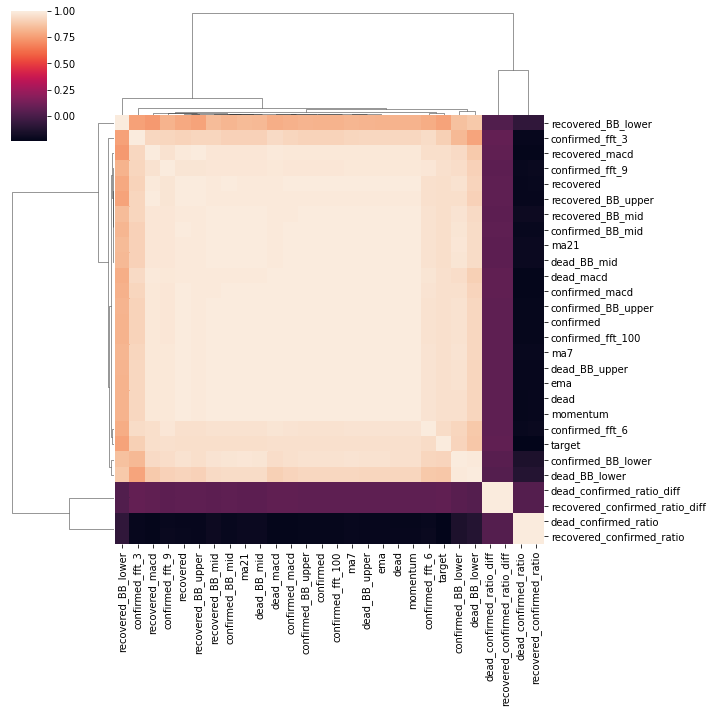

In [51]:
import seaborn as sns
sns.clustermap(df_ca.corr().fillna(0))

In [40]:
setup?

In [53]:
df_ca.columns

Index(['confirmed', 'dead', 'recovered', 'dead_confirmed_ratio',
       'recovered_confirmed_ratio', 'dead_confirmed_ratio_diff',
       'recovered_confirmed_ratio_diff', 'ma7', 'ma21', 'confirmed_macd',
       'confirmed_BB_lower', 'confirmed_BB_mid', 'confirmed_BB_upper', 'ema',
       'momentum', 'recovered_macd', 'recovered_BB_lower', 'recovered_BB_mid',
       'recovered_BB_upper', 'dead_macd', 'dead_BB_lower', 'dead_BB_mid',
       'dead_BB_upper', 'confirmed_fft_3', 'confirmed_fft_6',
       'confirmed_fft_9', 'confirmed_fft_100', 'target'],
      dtype='object')

In [41]:
clf = setup(data =df_ca , target = 'target',remove_multicollinearity =True,normalize=True,pca=False)
#       ,feature_interaction=True,feature_ratio = True )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4853
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(102, 28)"
4,Missing Values,False
5,Numeric Features,27
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [42]:
models=compare_models()

In [43]:
# remove colinear
models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1076.291600,4229397.666900,1770.047900,0.886800,1.730400,4.206600
1,Extreme Gradient Boosting,1045.825700,3728549.557600,1724.098500,0.884900,1.512000,0.930100
2,CatBoost Regressor,1225.822500,5853858.085300,2031.311700,0.877200,1.668000,2.864400
3,Gradient Boosting Regressor,1146.357500,5667047.894600,1976.572500,0.857100,1.544300,1.088300
4,AdaBoost Regressor,1336.051800,5621406.325200,2035.694900,0.856600,2.456700,18.076300
5,Random Forest,1195.379100,6013745.626600,2030.269500,0.855200,1.648800,1.476000
6,K Neighbors Regressor,1271.309300,6082745.054100,2118.157600,0.843300,2.383600,10.628700
7,Decision Tree,1415.078600,9334238.425000,2471.359300,0.817300,1.561100,0.829600
8,Ridge Regression,1492.953800,6530443.906400,2256.071900,0.816600,2.686600,22.108300
9,Bayesian Ridge,1492.483600,6552039.375600,2258.764900,0.814900,2.676300,21.485600


In [41]:
# to get out info's from compare_models
clfs=models.data['Model'].values
clfs

array(['Extra Trees Regressor', 'Extreme Gradient Boosting',
       'AdaBoost Regressor', 'Huber Regressor',
       'Passive Aggressive Regressor', 'Ridge Regression',
       'Random Forest', 'Gradient Boosting Regressor', 'Decision Tree',
       'Bayesian Ridge', 'Lasso Regression',
       'Orthogonal Matching Pursuit', 'Elastic Net',
       'K Neighbors Regressor', 'CatBoost Regressor',
       'Light Gradient Boosting Machine', 'Support Vector Machine',
       'Random Sample Consensus', 'Lasso Least Angle Regression',
       'Linear Regression', 'Least Angle Regression',
       'TheilSen Regressor'], dtype=object)

In [42]:
# make dic list for algorithms defined in pycaret 
clfs_ind={
    'Extra Trees Regressor':'et', 
    'Extreme Gradient Boosting':'xgboost',
    'CatBoost Regressor':'catboost', 
    'AdaBoost Regressor':'ada', 
    'Random Forest':'rf',    
    'Gradient Boosting Regressor':'gbr', 
    'Decision Tree':'dt',
    'Light Gradient Boosting Machine':'lightgbm', 
    'K Neighbors Regressor':'knn',
    'Lasso Least Angle Regression':'llar',
    'Random Sample Consensus':'ransac',
    'Ridge Regression':'ridge',
    'Linear Regression':'lr',
    'Elastic Net':'en',
    'Lasso Regression':'lasso',
    'Bayesian Ridge':'br',
    'Huber Regressor':'huber',
    'Orthogonal Matching Pursuit':'omp',
    'TheilSen Regressor':'tr',
    'Support Vector Machine':'svm',
    'Passive Aggressive Regressor':'par',
    'Least Angle Regression':'lar'
}

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1787.3647,6.232950e+06,2496.5877,0.7771,3.4270,541.5956
1,2197.2261,1.046253e+07,3234.5828,0.7692,1.8580,0.6139
2,2688.8226,2.938107e+07,5420.4306,0.6829,3.4446,13.3055
3,4065.4230,2.401851e+07,4900.8679,0.3813,2.0529,0.7186
4,1994.3351,1.054208e+07,3246.8574,0.4541,1.2460,4.3524
5,2618.4947,1.279071e+07,3576.4099,0.0769,2.2256,0.9666
6,1393.9390,6.030656e+06,2455.7394,0.7703,2.9977,6.9708
7,1942.7042,9.601447e+06,3098.6201,0.4423,1.9868,30.9823
8,2142.9030,1.056790e+07,3250.8299,0.8510,3.0298,0.2503
9,2093.7045,8.040683e+06,2835.6097,0.7069,1.9584,0.9315


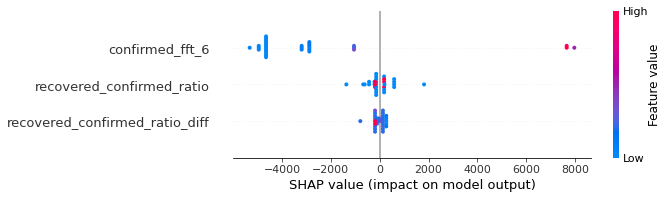

In [46]:
#clf_lgb = create_model('lightgbm')
clf_lgb=tune_model('lightgbm',n_iter=100)
interpret_model(clf_lgb)

In [60]:
clf_lgb

LGBMRegressor(learning_rate=0.6, max_depth=50, min_split_gain=0,
              n_estimators=10, num_leaves=150, random_state=1061, reg_alpha=0.2,
              reg_lambda=0.5)

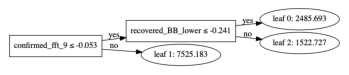

In [61]:
import lightgbm
lightgbm.plot_tree(clf_lgb)

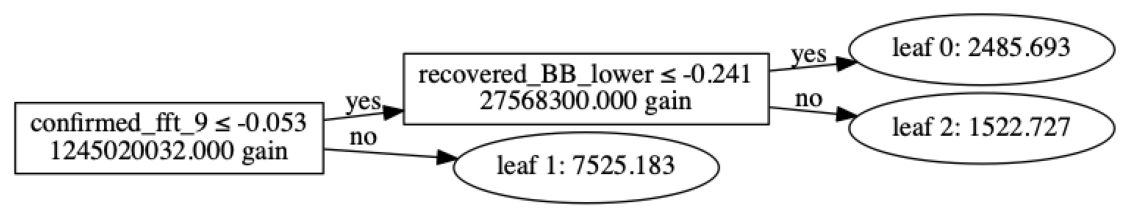

In [63]:
lightgbm.plot_tree(clf_lgb, tree_index=0, figsize=(20, 8), show_info=['split_gain'])
#plt.show()

In [62]:
g=lightgbm.create_tree_digraph(clf_lgb, tree_index=3, name='Tree3')
g.render(view=True)

'Tree3.gv.pdf'

In [57]:
tune_model?

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,367.0168,3.515339e+05,592.9030,0.9874,1.7488,15.3758
1,1483.6449,4.332038e+06,2081.3549,0.9044,2.8338,0.4493
2,2311.1179,2.499053e+07,4999.0531,0.7303,2.8710,5.5674
3,1993.3302,8.696103e+06,2948.9155,0.7760,1.5683,0.3989
4,975.7121,2.687144e+06,1639.2512,0.8609,0.6524,1.0935
5,916.3776,1.917041e+06,1384.5725,0.8617,0.2362,0.2272
6,828.8063,1.560152e+06,1249.0604,0.9406,1.9703,1.1233
7,738.5995,1.539512e+06,1240.7707,0.9106,0.9436,2.4258
8,2693.3314,1.846090e+07,4296.6152,0.7397,2.5415,0.2707
9,894.8582,1.311831e+06,1145.3520,0.9522,2.8878,0.9634


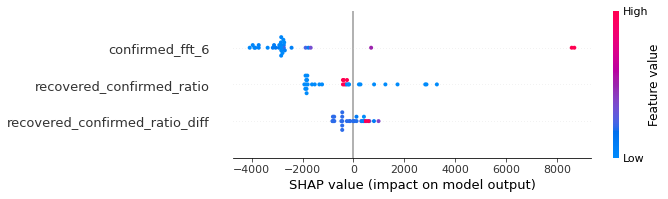

In [45]:
#clf_cat = create_model('catboost')
clf_cat=tune_model('catboost',n_iter=20,optimize='mae')
interpret_model(clf_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,432.3270,4.895636e+05,699.6882,0.9825,1.6386,6.0050
1,859.5139,1.889553e+06,1374.6102,0.9583,1.7139,0.4366
2,1964.6520,1.682450e+07,4101.7680,0.8184,2.1995,1.8133
3,2018.5401,7.336985e+06,2708.6870,0.8110,1.6162,0.3569
4,1697.7011,7.359815e+06,2712.8979,0.6189,1.0078,2.2196
5,831.3646,1.324272e+06,1150.7704,0.9044,0.2090,0.1831
6,1012.8420,2.077186e+06,1441.2446,0.9209,2.3388,0.6666
7,1045.6856,1.816279e+06,1347.6941,0.8945,1.2900,5.5974
8,1278.5593,4.750522e+06,2179.5693,0.9330,1.1425,0.1418
9,690.7630,7.083066e+05,841.6095,0.9742,2.3945,0.5983


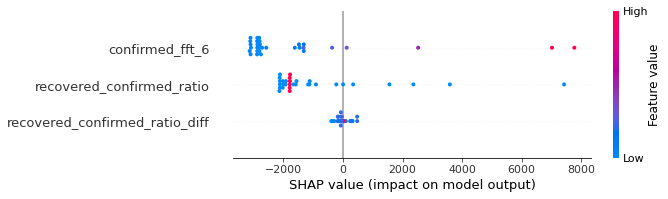

In [44]:
#clf_xgb = create_model('xgboost')
clf_xgb=tune_model('xgboost')
interpret_model(clf_xgb)

In [62]:
#clf_dt = create_model('dt')
clf_dt=tune_model('dt')
#interpret_model(clf_xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1806.7857,5.296179e+06,2301.3429,0.9703,0.5767,0.3485
1,2558.0000,8.774519e+06,2962.1815,0.9095,0.4747,0.2045
2,2749.7143,1.592803e+07,3990.9935,0.9107,1.3875,3.5273
3,3809.0000,4.357695e+07,6601.2840,0.6950,1.3770,0.5082
4,2458.2857,1.474614e+07,3840.0708,0.8619,0.7474,0.2056
5,2986.7143,2.097367e+07,4579.7018,0.8568,0.4472,0.5471
6,1964.5714,9.596689e+06,3097.8523,0.9458,1.0706,0.3284
7,1740.5000,6.982870e+06,2642.5120,0.9526,1.6069,0.4493
8,2422.0000,1.709724e+07,4134.8814,0.8514,1.0521,1.5164
9,1432.6667,6.798045e+06,2607.3060,0.9515,1.7585,0.4594


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,585.7950,9.376572e+05,968.3270,0.9665,1.4937,1.4801
1,926.4901,1.861760e+06,1364.4632,0.9589,1.7835,0.2336
2,3069.7885,4.598425e+07,6781.1685,0.5038,1.9720,1.9533
3,2280.8061,1.571776e+07,3964.5627,0.5951,0.8619,0.3783
4,1080.1984,4.355043e+06,2086.8740,0.7745,1.1889,3.1719
5,866.3685,1.273357e+06,1128.4313,0.9081,0.3116,0.2703
6,1789.3016,5.799158e+06,2408.1441,0.7791,2.8040,0.4251
7,1555.3528,7.771799e+06,2787.7946,0.5485,0.9300,0.4030
8,1458.3016,6.871914e+06,2621.4335,0.9031,1.4240,0.1642
9,1015.7959,1.362290e+06,1167.1716,0.9503,2.8141,1.0437


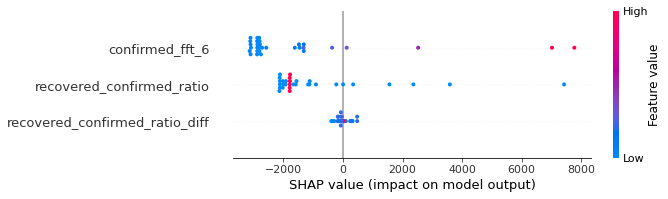

In [47]:
#clf_dt = create_model('dt')
clf_rf=tune_model('rf')
interpret_model(clf_xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,443.5301,4.408429e+05,663.9600,0.9842,1.7507,18.4568
1,1135.4013,4.579515e+06,2139.9801,0.8990,2.5835,0.2346
2,1940.8442,2.103099e+07,4585.9563,0.7730,2.3511,5.1493
3,2046.6260,1.182450e+07,3438.6765,0.6954,1.7036,0.4176
4,1066.1773,3.300978e+06,1816.8595,0.8291,1.0490,2.4360
5,1132.5175,2.655340e+06,1629.5214,0.8084,0.4343,0.3132
6,641.2422,9.807360e+05,990.3212,0.9626,2.3306,1.5766
7,1558.5708,4.903251e+06,2214.3287,0.7152,1.4371,7.7452
8,1590.9039,6.134519e+06,2476.7961,0.9135,1.9899,0.2876
9,648.2545,5.246145e+05,724.3028,0.9809,2.6672,0.5766


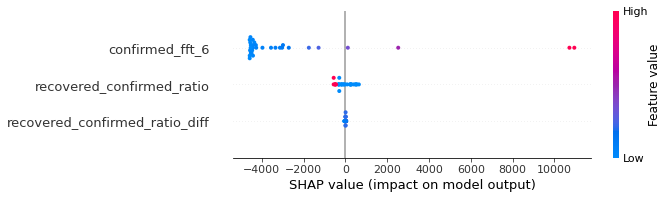

In [48]:
#clf_dt = create_model('dt')
clf_et=tune_model('et')
interpret_model(clf_et)

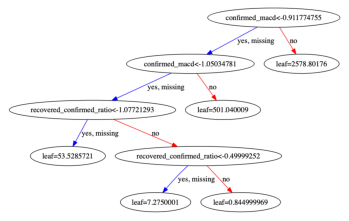

In [65]:
xgboost.plot_tree(clf_xgb)

In [64]:
evaluate_model(clf_lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

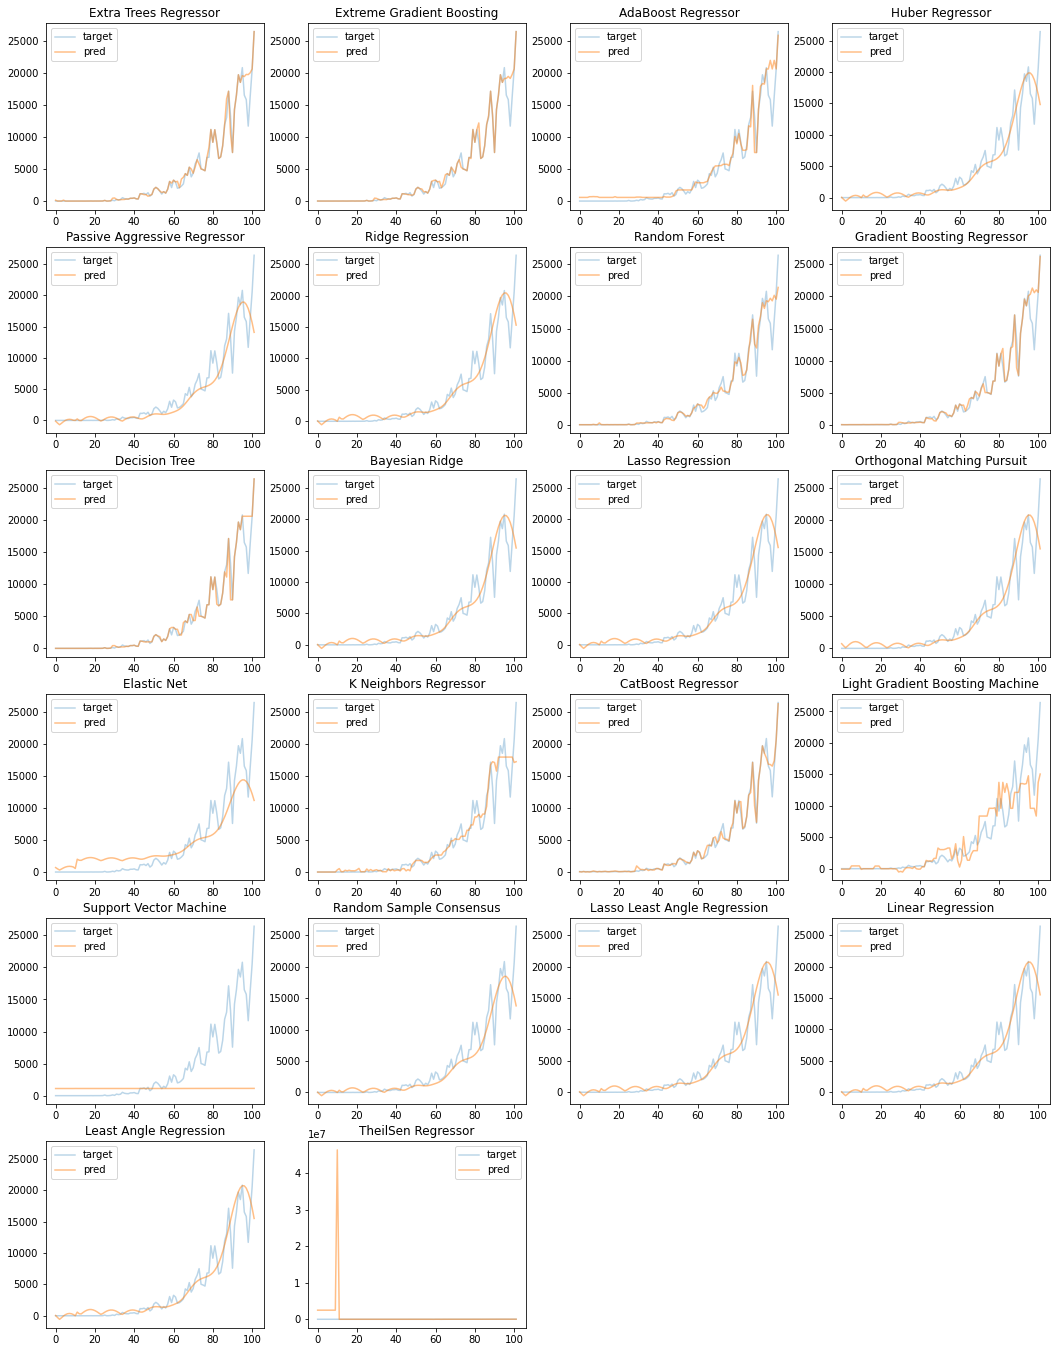

In [43]:
i=1
plt.figure(figsize=(18,24))
for clf in clfs:    
    clf_ = create_model(clfs_ind[clf])
    predict_clf=predict_model(clf_, data = df_ca);
    plt.subplot(6,4,i)
    plt.title(clf)
    #plt.plot(predict_clf[['target','Label']],alpha=0.3)
    plt.plot(predict_clf['target'],alpha=0.3,label=('target'))
    plt.plot(predict_clf['Label'],alpha=0.5,label=('pred'))

    plt.legend()
    i=i+1
    #predict_clf[['target','Label']].plot(kind='line',alpha=0.3,title=clf)#,subplots=True,layout=(1,2))

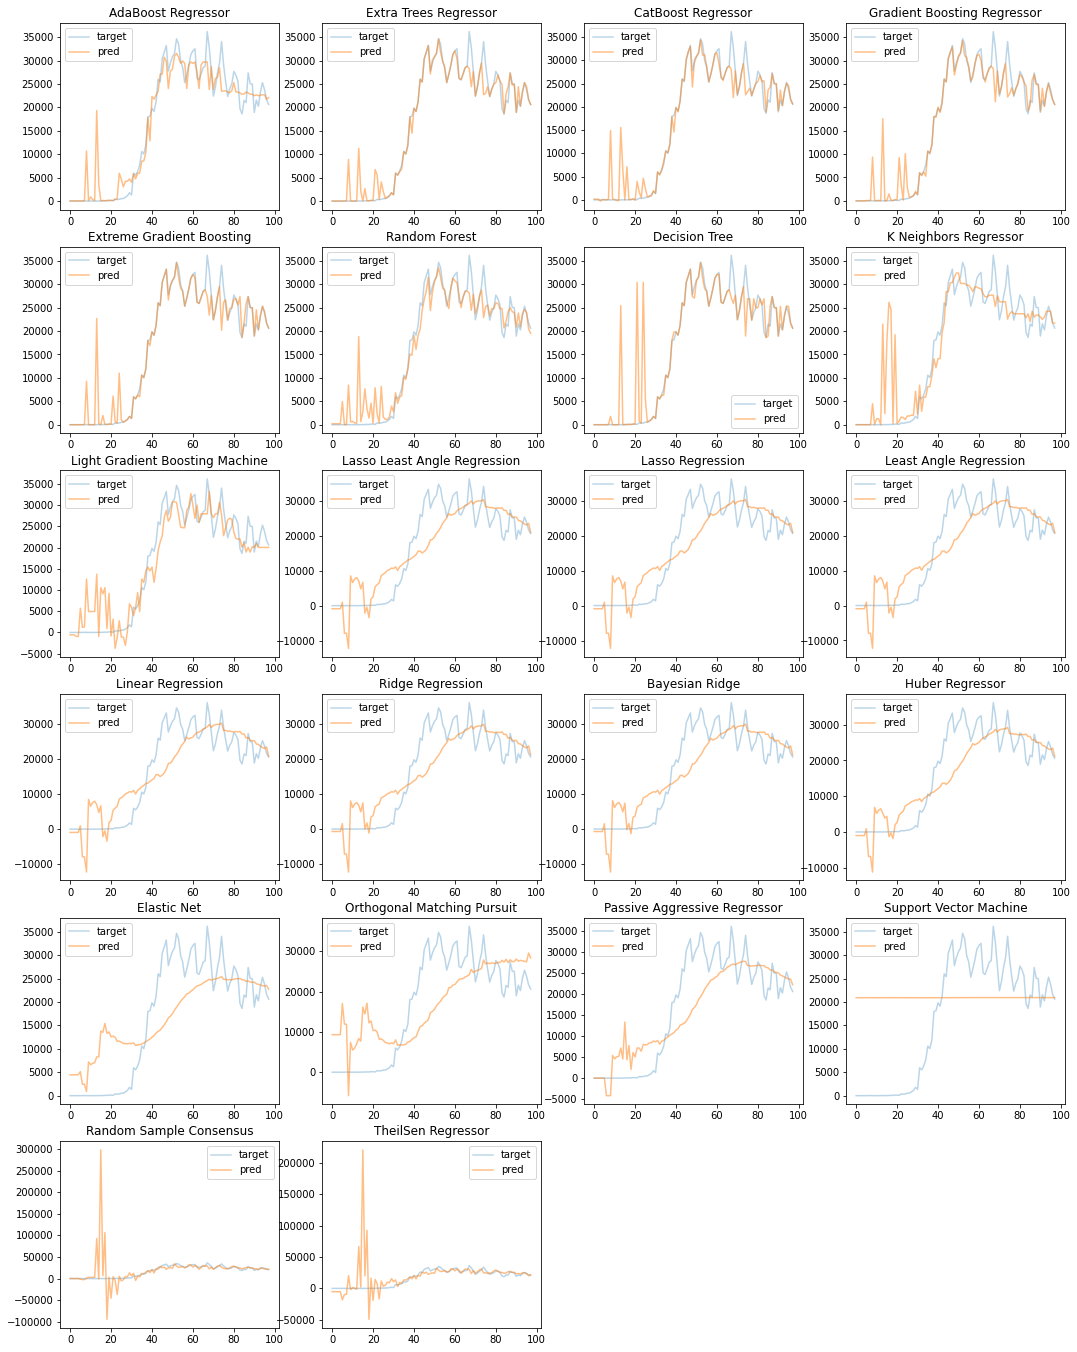

In [84]:
i=1
plt.figure(figsize=(18,24))
for clf in clfs:    
    clf_ = create_model(clfs_ind[clf])
    predict_clf=predict_model(clf_, data = df_ca);
    plt.subplot(6,4,i)
    plt.title(clf)
    #plt.plot(predict_clf[['target','Label']],alpha=0.3)
    plt.plot(predict_clf['target'],alpha=0.3,label=('target'))
    plt.plot(predict_clf['Label'],alpha=0.5,label=('pred'))

    plt.legend()
    i=i+1
    #predict_clf[['target','Label']].plot(kind='line',alpha=0.3,title=clf)#,subplots=True,layout=(1,2))

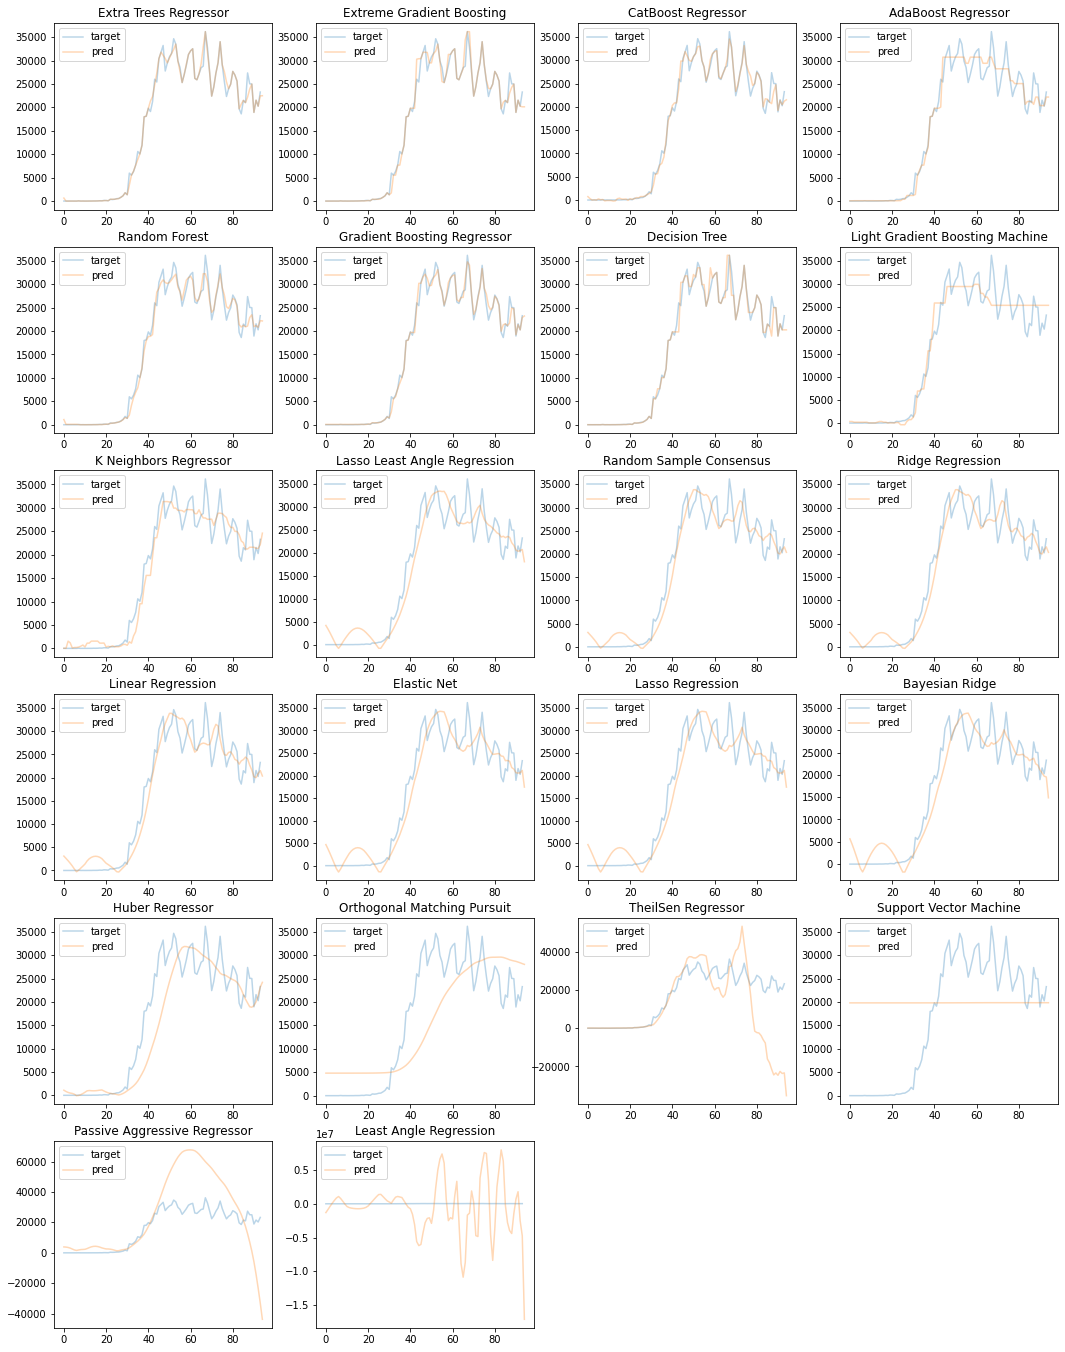

In [108]:
i=1
plt.figure(figsize=(18,24))
for clf in clfs:    
    clf_ = create_model(clfs_ind[clf])
    predict_clf=predict_model(clf_, data = df_ca);
    plt.subplot(6,4,i)
    plt.title(clf)
    #plt.plot(predict_clf[['target','Label']],alpha=0.3)
    plt.plot(predict_clf['target'],alpha=0.3,label=('target'))
    plt.plot(predict_clf['Label'],alpha=0.5,label=('pred'))

    plt.legend()
    i=i+1
    #predict_clf[['target','Label']].plot(kind='line',alpha=0.3,title=clf)#,subplots=True,layout=(1,2))

Model Ensembling, Blending and Stacking
---
To get better prediction result, we can Ensemble, Blend and Stack `pre-trained` models together to get new one. Here, we use the pycaret to demostrate how to make such models:

Blend Model
---


In [51]:
clf_blender = blend_models(estimator_list = [clf_lgb, clf_dt, clf_cat, clf_xgb,clf_rf,clf_et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5091.3324,3.211482e+07,5666.9941,0.7820,3.1306,931.0749
1,1898.0022,5.085021e+06,2254.9991,0.9689,0.8460,1.1687
2,3327.7310,1.948060e+07,4413.6836,0.9036,3.7725,137.3030
3,3196.6028,1.564727e+07,3955.6629,0.8537,0.5100,0.4970
4,3641.7323,1.974424e+07,4443.4487,0.8915,1.8772,14.5077
5,1936.8923,8.098615e+06,2845.8066,0.9609,2.6549,19.4587
6,3575.9654,2.086025e+07,4567.3021,0.8238,2.6011,32.3375
7,3735.9279,2.715588e+07,5211.1301,0.7854,0.7212,0.8753
8,6525.1509,5.458749e+07,7388.3344,0.4786,2.6621,32.9233
9,3400.6409,2.505131e+07,5005.1283,0.7675,2.9937,295.6232


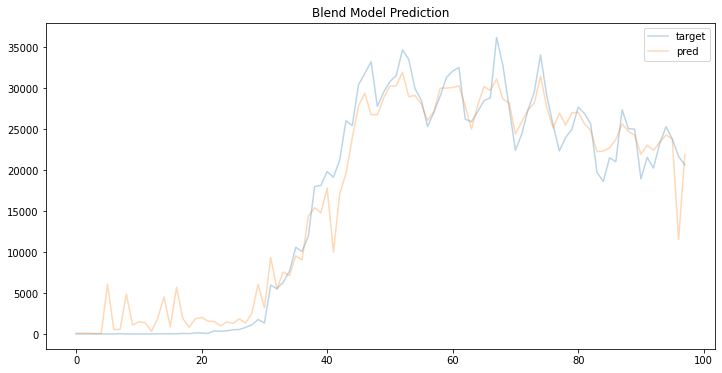

In [88]:
plt.figure(figsize=(12,6))
plt.title("Blend Model Prediction")
plt.plot(predict_clf_blend['target'],alpha=0.3,label=('target'))
plt.plot(predict_clf_blend['Label'],alpha=0.3,label=('pred'))
plt.legend()
#predict_clf[['target','Label']].plot(kind='line',alpha=0.3,title=clf)#,subplots=True,layout=(1,2))

In [52]:
predict_clf_blend=predict_model(clf_blender, data = df_ca);

In [92]:
def pred_plot(clf,data=df_ca,title="Prediction"):
    df=pd.DataFrame(index=df_ca.index)
    predict_clf=predict_model(clf, data = data);
    #print(predict_clf.info())
    df['pred']=predict_clf['Label'].values
    
    df['target']=predict_clf['target'].values
    df[['target','pred']].plot(figsize=(10,6),title=title)
    #print(df.head())

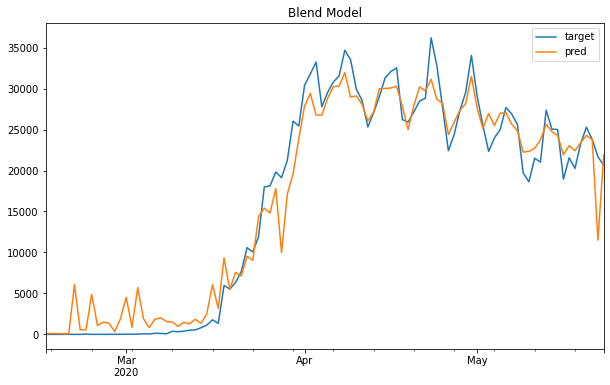

In [93]:
pred_plot(clf_blender,title="Blend Model")

Stack Model
---

In [80]:
clf_stack = stack_models(estimator_list = [clf_dt,clf_cat,clf_lgb,clf_xgb,clf_rf], meta_model = clf_et)
# creating multiple layer stacking from specific models


#stacknet = create_stacknet([[lightgbm, xgboost, ada], [et, gbr, catboost, rf]])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3381.7156,1.404125e+07,3747.1654,0.9047,3.0226,801.0081
1,1615.4053,3.168830e+06,1780.1209,0.9806,0.7225,0.8897
2,2452.4159,1.153257e+07,3395.9637,0.9429,3.5191,78.5031
3,2676.6328,9.780360e+06,3127.3566,0.9086,0.2739,0.2436
4,2402.6396,1.199054e+07,3462.7353,0.9341,1.9032,14.1213
5,1766.6322,5.811041e+06,2410.6100,0.9720,2.5898,11.0180
6,3804.1031,2.946753e+07,5428.4004,0.7511,2.3150,9.1416
7,3280.1550,2.216334e+07,4707.7961,0.8249,0.6273,0.6607
8,5285.0523,3.819213e+07,6179.9784,0.6352,2.3572,19.3354
9,4009.8336,3.199414e+07,5656.3358,0.7031,3.0375,328.9199


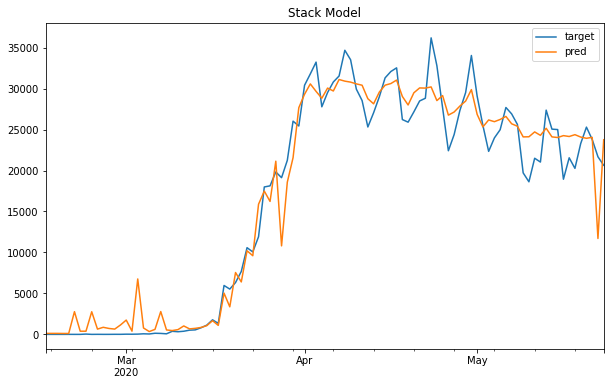

In [94]:
pred_plot(clf_stack,title="Stack Model")

In [83]:
clf_stacknet = create_stacknet([[clf_dt,clf_cat,clf_lgb],[clf_et,clf_xgb,clf_rf]])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2919.4868,1.297115e+07,3601.5481,0.9120,2.0438,62.5576
1,2096.8603,6.322610e+06,2514.4800,0.9614,0.9282,1.5656
2,3968.0693,2.682566e+07,5179.3491,0.8672,4.1987,191.1948
3,2974.9117,1.155594e+07,3399.4036,0.8920,0.4424,0.4172
4,3950.5540,2.080673e+07,4561.4390,0.8857,3.0276,203.9505
5,2580.2312,8.930539e+06,2988.4007,0.9569,3.2251,5.7427
6,6876.9386,1.491554e+08,12212.9201,-0.2601,3.9219,261.5231
7,3835.9675,2.240249e+07,4733.1273,0.8230,0.6106,0.6539
8,3943.0753,2.188213e+07,4677.8342,0.7910,1.7515,7.4422
9,5176.3145,5.828136e+07,7634.2228,0.4591,3.1712,454.4104


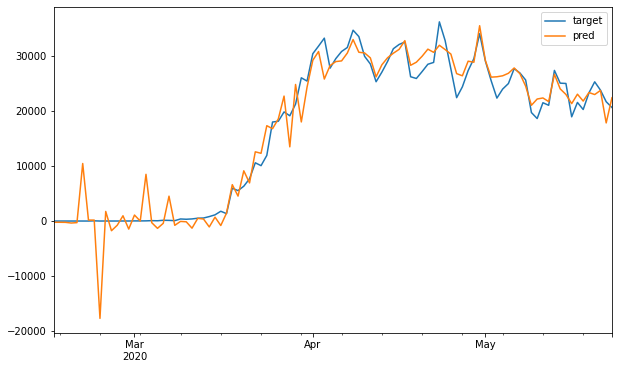

In [85]:
pred_plot(clf_stacknet)

In [61]:
tune_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2524.7056,1.524128e+07,3904.0084,0.9283,3.3923,0.1117
1,1871.0968,7.390278e+06,2718.5066,0.9425,0.9840,1.9182
2,2096.7085,1.065921e+07,3264.8441,0.8669,1.3375,5.5427
3,1891.2936,6.484925e+06,2546.5516,0.9515,3.7121,78.6526
4,3055.0603,1.849969e+07,4301.1265,0.8382,0.6226,0.7024
5,1902.3700,5.013557e+06,2239.0974,0.9685,1.9090,35.2976
6,2553.2761,1.242542e+07,3524.9703,0.9435,2.3274,0.2508
7,1972.3265,1.172081e+07,3423.5668,0.8984,1.4864,4.3514
8,1246.7142,2.483971e+06,1576.0618,0.9837,2.7857,57.1135
9,1954.4545,5.151764e+06,2269.7498,0.9475,0.6580,0.7497


LGBMRegressor(learning_rate=1, max_depth=90, min_split_gain=0, n_estimators=120,
              num_leaves=80, random_state=6092, reg_alpha=0.1, reg_lambda=0.4)

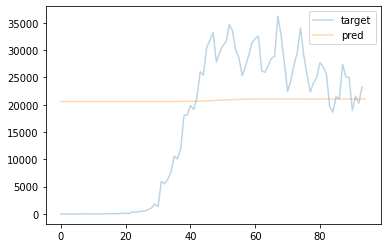

In [60]:
predict_SVM=predict_model(clf_SVM, data = df_ca);
plt.plot(predict_SVM['target'],alpha=0.3,label=('target'))
plt.plot(predict_SVM['Label'],alpha=0.3,label=('pred'))

plt.legend()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [74]:
models = [
    AdaBoostRegressor(random_state=0, learning_rate=0.1),
    RandomForestRegressor(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3),
    lgb(random_state=0, n_jobs=-1, learning_rate=0.01, 
                 n_estimators=100, max_depth=3),
    xgb(random_state=0, n_jobs=-1, learning_rate=0.01, 
                 n_estimators=100, max_depth=3),
    cgb(random_state=0, learning_rate=0.01, 
                 n_estimators=100, max_depth=3,verbose=0)
]

In [75]:
S_train, S_test = stacking(models,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=True,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=mean_absolute_error, # metric: callable
                           n_folds=5,                  # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info

task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [AdaBoostRegressor]
    fold  0:  [1254.34161797]
    fold  1:  [2327.97590604]
    fold  2:  [2154.90076946]
    fold  3:  [1852.53643246]
    fold  4:  [1179.81343537]
    ----
    MEAN:     [1753.91363226] + [464.59183562]
    FULL:     [1754.94821920]

model  1:     [RandomForestRegressor]
    fold  0:  [1094.72009006]
    fold  1:  [1947.93435021]
    fold  2:  [2269.60239171]
    fold  3:  [1748.61541995]
    fold  4:  [1456.11453020]
    ----
    MEAN:     [1703.39735643] + [403.50166476]
    FULL:     [1698.33985264]

model  2:     [LGBMRegressor]
    fold  0:  [5005.68988234]
    fold  1:  [4762.24765338]
    fold  2:  [6665.35269423]
    fold  3:  [5425.02811474]
    fold  4:  [5747.91858466]
    ----
    MEAN:     [5521.24738587] + [665.05564737]
    FULL:     [5503.54520204]

model  3:     [XGBRegressor]
    fold  0:  [6791.40061391]
    fold  1:  [60

In [76]:
# Initialize 2nd level model
model_lgb = lgb(random_state=0, n_jobs=-1, learning_rate=0.01, 
                     n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model_lgb = model_lgb.fit(S_train, y_train)

# Predict
y_pred = model_lgb.predict(S_test)


# Final prediction score
print('Final prediction score: [%.8f]' % mean_absolute_error(y_test, y_pred))

Final prediction score: [4977.65135700]


In [77]:
m_models={'AadaBoost':models[0],'RandomForest':models[1],\
          'lgb':models[2],'xgb':models[3],'cat':models[4]}

In [78]:
m_models['lgb']

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [79]:
# Initialize 2nd level model
model = lgb(random_state=0, n_jobs=-1, learning_rate=0.01, 
                     n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)


# Final prediction score
print('Final prediction score: [%.8f]' % mean_absolute_error(y_test, y_pred))

Final prediction score: [4977.65135700]


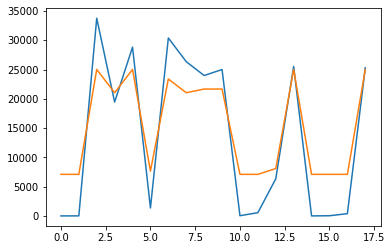

In [80]:
plt.plot(y_test,)
plt.plot(y_pred)

In [37]:
len(y_test)

18

In [42]:
len(df_all4[-len(y_test)-1:-1])

18

In [43]:
#df_pred=df_all4[-24:-1].copy()
df_pred=df_all4[-len(y_test)-1:-1].copy()

In [44]:
m_seq=['AdaBoost','RandomForest','LightBoost','XgbBoost','CatBoost']
n=0
for m in models:
    m=models[n]
    # Fit 2nd level model
    m = m.fit(S_train, y_train)

    # Predict
    y_pred = m.predict(S_test)
    df_pred[m_seq[n]]=y_pred


    # Final prediction score
    print('Final prediction score: [%.8f]' % mean_absolute_error(y_test, y_pred))
    n=n+1

Final prediction score: [0.54620165]
Final prediction score: [0.49655131]
Final prediction score: [1.48436475]
Final prediction score: [2.69196365]
Final prediction score: [1.38596008]


In [45]:
df_pred

,confirmed,dead,recovered,confirmed_diff,dead_diff,recovered_diff,target,ma7,ma21,macd,ema,momentum,AdaBoost,RandomForest,LightBoost,XgbBoost,CatBoost
2020-04-24,13.716087,10.849221,11.503683,10.496510,7.478735,9.845700,10.398092,10.716854,10.234048,0.887840,10.829479,9.849221,0.366204,0.636600,4.702207,0.454980,4.203258
2020-04-25,13.751670,10.892211,11.516649,10.398092,7.724447,7.165493,10.226730,10.759960,10.310226,0.852265,10.871300,9.892211,3.206355,2.734216,4.702207,2.265578,4.729999
2020-04-26,13.780698,10.912941,11.580481,10.226730,7.027315,8.797397,10.017396,10.801808,10.381151,0.816334,10.899060,9.912941,10.203503,10.220425,9.352725,6.476661,9.187201
2020-04-27,13.803638,10.937028,11.621107,10.017396,7.199678,8.397734,10.101764,10.841238,10.447710,0.780801,10.924372,9.937028,10.170528,10.046057,8.985009,6.476661,9.125846
2020-04-28,13.828015,10.974317,11.660802,10.101764,7.667158,8.414717,10.215667,10.878090,10.508760,0.747039,10.957669,9.974317,10.203503,10.220425,9.346895,6.476661,9.185136
2020-04-29,13.854645,11.018104,11.701237,10.215667,7.868254,8.473241,10.292688,10.914012,10.566142,0.715567,10.997959,10.018104,8.891450,8.455558,8.174207,4.662528,7.982918
2020-04-30,13.882632,11.050842,11.944370,10.292688,7.615791,10.411148,10.435233,10.947809,10.620173,0.685366,11.033215,10.050842,10.203503,10.220425,9.352725,6.476661,9.182608
2020-05-01,13.913963,11.081281,12.007719,10.435233,7.574558,9.217217,10.277772,10.980961,10.671002,0.656323,11.065259,10.081281,10.170528,10.064044,9.231121,6.476661,9.148599
2020-05-02,13.939973,11.103000,12.074727,10.277772,7.263330,9.338558,10.146512,11.011073,10.718764,0.627821,11.090420,10.103000,10.203503,10.220425,9.352725,6.476661,9.187201
2020-05-03,13.962240,11.122590,12.101562,10.146512,7.180831,8.470311,10.013955,11.041023,10.764164,0.599898,11.111867,10.122590,10.203503,10.220425,9.231121,6.476661,9.126439


In [46]:
df_pred.columns

Index(['confirmed', 'dead', 'recovered', 'confirmed_diff', 'dead_diff',
       'recovered_diff', 'target', 'ma7', 'ma21', 'macd', 'ema', 'momentum',
       'AdaBoost', 'RandomForest', 'LightBoost', 'XgbBoost', 'CatBoost'],
      dtype='object')

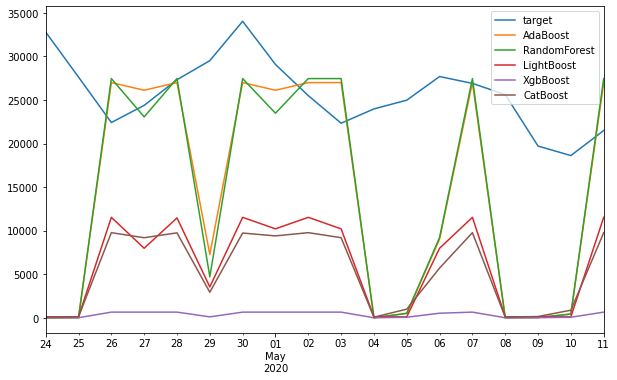

In [49]:
cols=['target','AdaBoost', 'RandomForest', 'LightBoost', 'XgbBoost', 'CatBoost']

np.expm1(df_pred[cols]).plot(figsize=[10,6])

#plt.ylim([0,36000])

In [52]:
y[-23:]

array([25517., 27539., 28486., 28819., 36188., 32796., 27631., 22412.,
       24385., 27327., 29515., 34037., 29078., 25501., 22335., 23976.,
       24980., 27692., 26906., 25621., 19710., 18621., 21495.])

In [34]:
# step2 CV with 'neg_mean_absolute_error' scoring
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2020)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance

In [35]:
print('MAE: 𝛍 = %.3f ( 𝛔 = %.3f)' % (mean(n_scores), std(n_scores)))

MAE: 𝛍 = -81.786 ( 𝛔 = 37.957)


In [37]:
model = BaggingRegressor()
# fit the model on the whole dataset
model.fit(X, y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [38]:
# predict the increase of confirmed
row=[df_all1.iloc[-1,:3].values]
yhat = model.predict(row)
date=df_all1.index.strftime('%Y-%m-%d')[-1]
print('Predicted Confirmed increase (after the date of %s) : %d' % (date,yhat[0]))

Predicted Confirmed increase (after the date of 2020-05-10) : 104


In [37]:
# How good is good, make result visualization
def result_viz(df_,model,scale=True):
    df=df_.iloc[:,:3].copy()
    df['y']=df_['confirmed_diff'].values
    
    rows=df.iloc[:,:3].values
    yhat = model.predict(rows)
    df['yhat']=np.rint(yhat)
    df['yhat']=df['yhat'].shift()
    
    plt.figure(figsize=(10.,6))
    if (scale):
       df[['y','yhat']].plot(figsize=(14,6),kind='line', marker='o',\
                          title="COVID-19 Confirmed at  %s Predicted" %country);
    else:
       np.log1p(df[['y','yhat']]).plot(figsize=(14,6),kind='line', marker='o',\
                          title="COVID-19 Confirmed at  %s Predicted" %country); 

<Figure size 720x432 with 0 Axes>

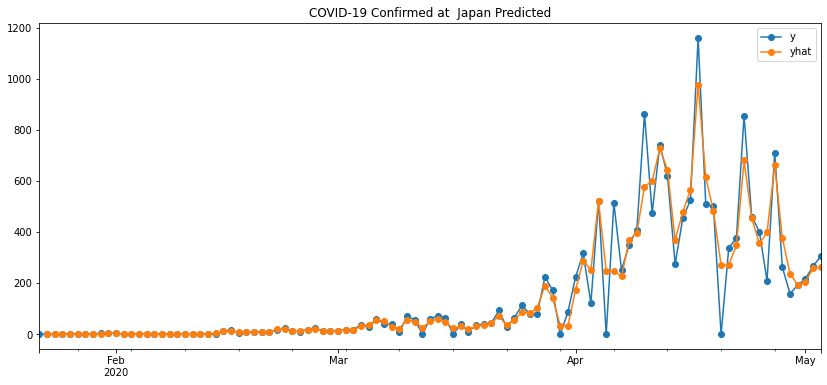

In [38]:
 result_viz(df_all1,model)

`np.rint`: Round elements of the array to the nearest integer

<Figure size 720x432 with 0 Axes>

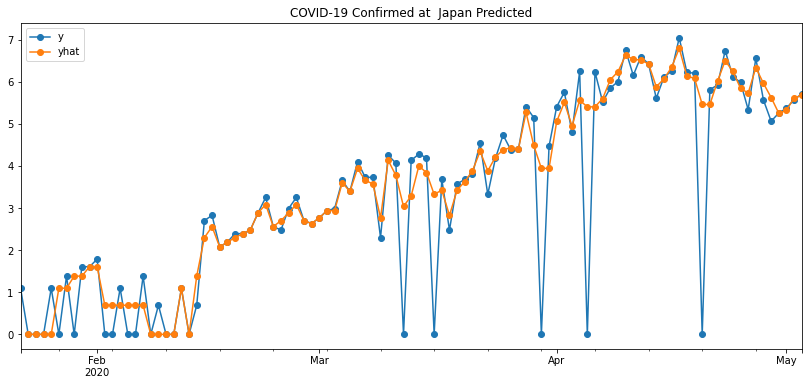

In [32]:
 result_viz(df_all1,model,scale=False)

In [44]:
# How good is good, make result visualization
def result_viz_plotly(df_,model,scale=True):
    df=df_.iloc[:,:3].copy()
    df['y']=df_['confirmed_diff'].values
    
    rows=df.iloc[:,:3].values
    yhat = model.predict(rows)
    df['yhat']=np.rint(yhat)
    df['yhat']=df['yhat'].shift()
    
    features=['y','yhat']
    
    trace=[]
    for i in range(len(features)):
        trace_tmp= go.Scatter(x=df.index,y=(df[features[i]]), \
                              mode='lines+markers',name='lines+markers')
        trace.append(trace_tmp)
        layout= go.Layout(images= [
            dict( xref= "x",
                  yref= "y",
                  x= 'Jan 2020',
                  y= 0,
                  sizing= "stretch",
                  opacity= 0.5,
                  layer= "below")])
    fig=go.Figure(data=trace,layout=layout)

    fig.update_layout(
        title={
                'text': "Predicted NCOPID-19 Comfirmed In %s" %country,
                'y':0.9,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'})
    
    plot(fig, filename='NCOVID-19_%s.html' %country) 

In [40]:
 result_viz_plotly(df_all1,model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model_rf =RandomForestRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_rf, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: 𝛍 = %.3f ( 𝛔 = %.3f)' % (mean(n_scores), std(n_scores)))

MAE: 𝛍 = -80.698 ( 𝛔 = 45.014)


In [41]:
model_rf =RandomForestRegressor()
model_rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Feature: 0, Score: 0.38042
Feature: 1, Score: 0.33406
Feature: 2, Score: 0.28553


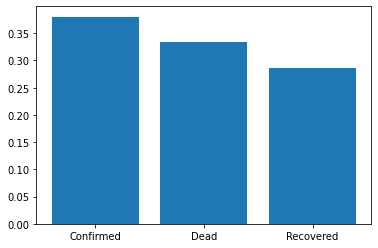

In [35]:
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2],labels=['Confirmed','Dead','Recovered']);

<Figure size 720x432 with 0 Axes>

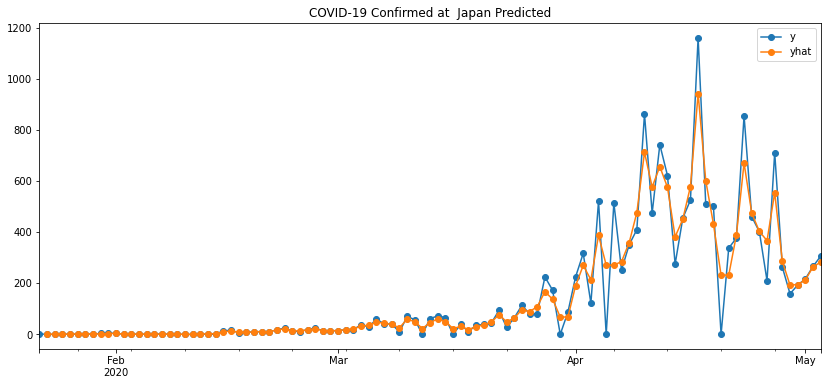

In [37]:
 result_viz(df_all1,model_rf)

In [68]:
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance

In [69]:
print('MAE: 𝛍 = %.3f ( 𝛔 = %.3f)' % (mean(n_scores), std(n_scores)))

MAE: 𝛍 = -26647.879 ( 𝛔 = 22087.461)


In [70]:
model = BaggingRegressor()
# fit the model on the whole dataset
model.fit(X, y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [71]:
# predict the increase of confirmed
row=[df_all1.iloc[-1,:3].values]
yhat = model.predict(row)
date=df_all1.index.strftime('%Y-%m-%d')[-1]
print('Predicted Confirmed increase (after the date of %s) : %d' % (date,yhat[0]))

Predicted Confirmed increase (after the date of 2020-05-03) : 277


<Figure size 720x432 with 0 Axes>

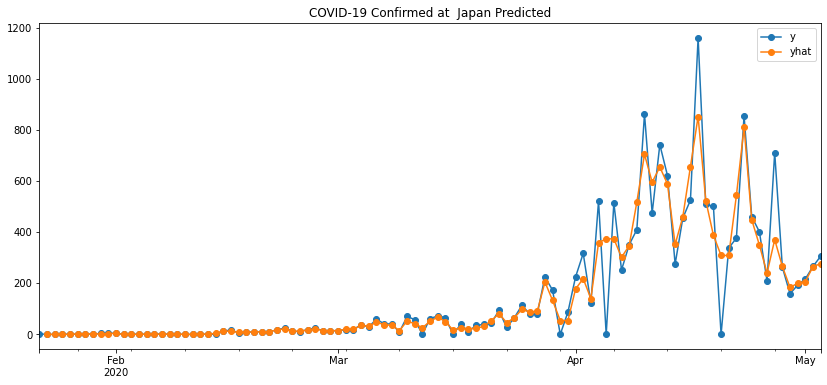

In [72]:
 result_viz(df_all1,model)

##### Bagging Hyperparameters

---
An important hyperparameter for the Bagging algorithm is the number of decision trees used in the ensemble.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Bagging and related ensemble of decision trees algorithms (like random forest) appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 5.

The example below explores the effect of the number of trees with values between 10 to 30.

In [76]:
RepeatedStratifiedKFold?

In [91]:
np.arange(5,35,5)

array([ 5, 10, 15, 20, 25, 30])

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



> 5: 𝛍 = -81.204 ( 𝛔 = 20.479)
> 10: 𝛍 = -77.051 ( 𝛔 = 19.037)
> 15: 𝛍 = -78.145 ( 𝛔 = 18.810)


/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/ana

> 20: 𝛍 = -77.299 ( 𝛔 = 21.170)
> 25: 𝛍 = -76.158 ( 𝛔 = 21.203)


/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/Users/cch/anaconda36/ana

> 30: 𝛍 = -77.493 ( 𝛔 = 21.461)


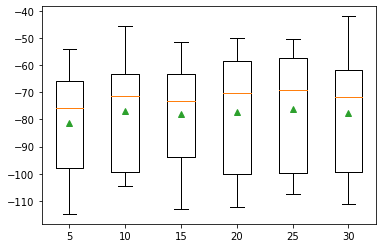

In [39]:
def get_models():
    models = dict()
    for i in np.arange(5,35,5):
        models[str(i)]  = BaggingRegressor(n_estimators=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1357)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_data(df_all1)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('> %s: 𝛍 = %.3f ( 𝛔 = %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True);
#pyplot.show()

In [58]:
models['20']

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=20,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

<Figure size 720x432 with 0 Axes>

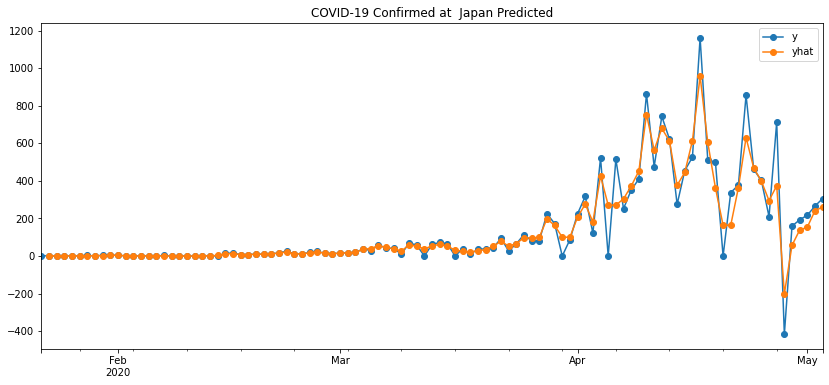

In [59]:
models['20'].fit(X,y) 
result_viz(df_all1,models['20'])

<Figure size 720x432 with 0 Axes>

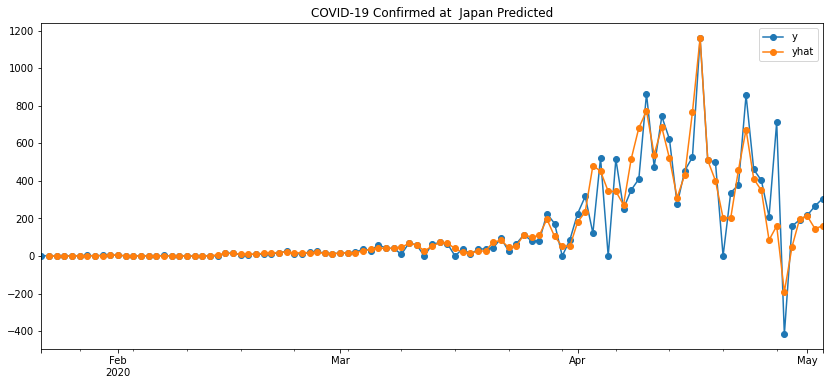

<Figure size 720x432 with 0 Axes>

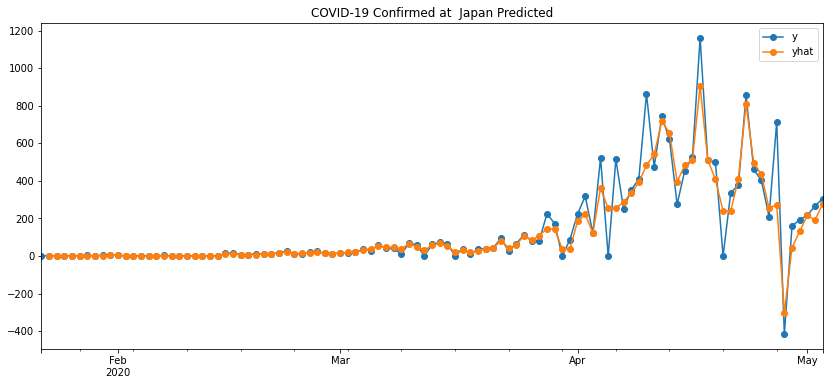

<Figure size 720x432 with 0 Axes>

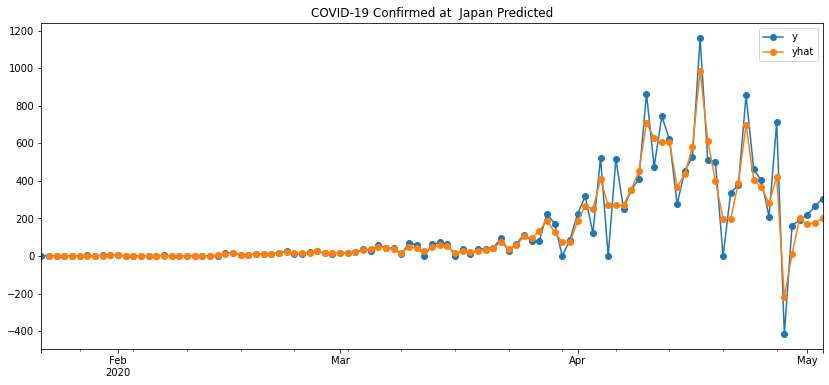

<Figure size 720x432 with 0 Axes>

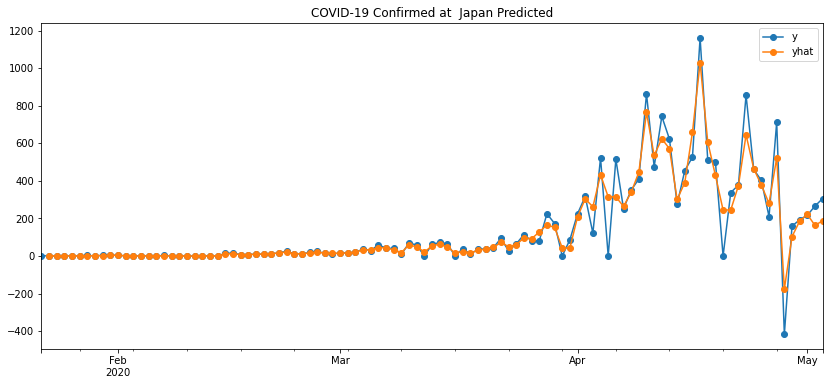

<Figure size 720x432 with 0 Axes>

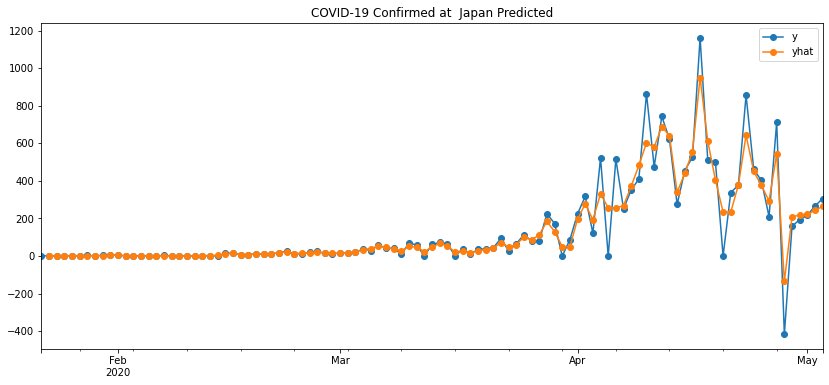

<Figure size 720x432 with 0 Axes>

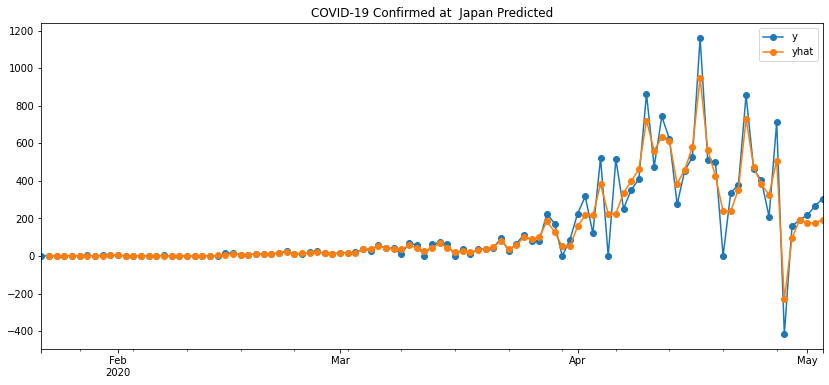

In [60]:
for i in np.arange(5,35,5):
    models[str(i)].fit(X,y) 
    result_viz(df_all1,models[str(i)])

In [61]:
import warnings
warnings.filterwarnings("ignore")

Explore Number of Samples
---
The size of the bootstrap sample can also be varied.

The default is to create a bootstrap sample that has the same number of examples as the original dataset. Using a smaller dataset can increase the variance of the resulting decision trees and could result in better overall performance.

The number of samples used to fit each decision tree is set via the “max_samples” argument.

The example below explores different sized samples as a ratio of the original dataset from 10 percent to 100 percent (the default).

In [58]:
RepeatedStratifiedKFold?

> 0.1: 𝛍 = -2.894 ( 𝛔 = 0.956)
> 0.2: 𝛍 = -2.265 ( 𝛔 = 0.831)
> 0.3: 𝛍 = -2.085 ( 𝛔 = 0.902)
> 0.4: 𝛍 = -1.972 ( 𝛔 = 0.761)
> 0.5: 𝛍 = -2.041 ( 𝛔 = 0.725)
> 0.6: 𝛍 = -2.073 ( 𝛔 = 0.703)
> 0.7: 𝛍 = -2.127 ( 𝛔 = 0.738)
> 0.8: 𝛍 = -2.140 ( 𝛔 = 0.704)
> 0.9: 𝛍 = -2.152 ( 𝛔 = 0.728)
> 1.0: 𝛍 = -2.190 ( 𝛔 = 0.709)


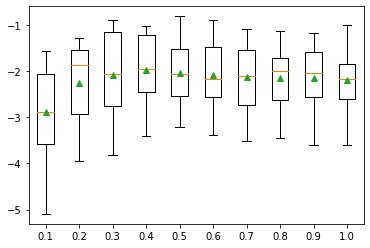

In [105]:
def get_models():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] =BaggingRegressor(max_samples=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_data(df_all1)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('> %s: 𝛍 = %.3f ( 𝛔 = %.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True);

Bagging Extensions
---
There are many modifications and extensions to the bagging algorithm in an effort to improve the performance of the approach.

Perhaps the most famous is the random forest algorithm.

There is a number of less famous, although still effective, extensions to bagging that may be interesting to investigate.

This section demonstrates some of these approaches, such as pasting ensemble, random subspace ensemble, and the random patches ensemble.

We are not racing these extensions on the dataset, but rather providing working examples of how to use each technique that you can copy-paste and try with your own dataset.

Pasting Ensemble
---
The Pasting Ensemble is an extension to bagging that involves fitting ensemble members based on random samples of the training dataset instead of bootstrap samples.

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: 𝛍 = %.3f ( 𝛔 = %.3f)' % (mean(n_scores), std(n_scores)))


MAE: 𝛍 = -86.349 ( 𝛔 = 51.522)


In [63]:
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [64]:
# predict the increase of confirmed
row=[df_all1.iloc[-1,:3].values]
yhat = model.predict(row)
date=df_all1.index.strftime('%Y-%m-%d')[-1]
print('Predicted Confirmed increase (after the date of %s) : %d' % (date,yhat[0]))

Predicted Confirmed increase (after the date of 2020-05-03) : 266


<Figure size 720x432 with 0 Axes>

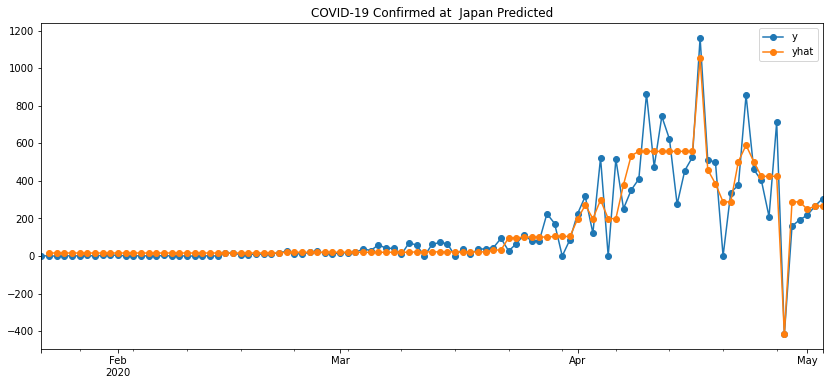

In [65]:
result_viz(df_all1,model)

Adapted Boost algorithm (Explore Learning Rate)
---

AdaBoost combines the predictions from short one-level decision trees, called decision stumps, although other algorithms can also be used. Decision stump algorithms are used as the AdaBoost algorithm seeks to use many weak models and correct their predictions by adding additional weak models.

AdaBoost also supports a learning rate that controls the contribution of each model to the ensemble prediction.

This is controlled by the “learning_rate” argument and by default is set to 1.0 or full contribution. Smaller or larger values might be appropriate depending on the number of models used in the ensemble. There is a balance between the contribution of the models and the number of trees in the ensemble.

More trees may require a smaller learning rate; fewer trees may require a larger learning rate.

The example below explores learning rate values between 0.1 and 2.0 in 0.1 increments.

[**Note**].
To get the extrema, we follow the differention rule:

\begin{align}
f'(x)&= &\frac{d f(x)}{d x}\\
& \Downarrow\\
f'(x)&\approx&\frac{f(x+\triangle x)-f(x)}{\triangle x}\\
\Rightarrow f(x+\triangle x)&\approx&f(x)+f'(x)\triangle x
\end{align}
where $f'(x)$ is the **learning rate** from $x$ to $x+\triangle x$.


Learning rate, 0.100:  𝛍 = -84.353 ( 𝛔 = 49.786)
Learning rate, 0.200:  𝛍 = -84.780 ( 𝛔 = 49.287)
Learning rate, 0.300:  𝛍 = -85.775 ( 𝛔 = 47.429)
Learning rate, 0.400:  𝛍 = -87.318 ( 𝛔 = 51.488)
Learning rate, 0.500:  𝛍 = -89.191 ( 𝛔 = 51.949)
Learning rate, 0.600:  𝛍 = -85.914 ( 𝛔 = 50.994)
Learning rate, 0.700:  𝛍 = -87.657 ( 𝛔 = 48.349)
Learning rate, 0.800:  𝛍 = -87.999 ( 𝛔 = 48.772)
Learning rate, 0.900:  𝛍 = -90.087 ( 𝛔 = 49.488)
Learning rate, 1.000:  𝛍 = -91.127 ( 𝛔 = 49.835)
Learning rate, 1.100:  𝛍 = -88.200 ( 𝛔 = 46.634)
Learning rate, 1.200:  𝛍 = -86.110 ( 𝛔 = 49.213)
Learning rate, 1.300:  𝛍 = -92.716 ( 𝛔 = 46.053)
Learning rate, 1.400:  𝛍 = -92.762 ( 𝛔 = 45.944)
Learning rate, 1.500:  𝛍 = -96.095 ( 𝛔 = 45.921)
Learning rate, 1.600:  𝛍 = -99.920 ( 𝛔 = 47.074)
Learning rate, 1.700:  𝛍 = -102.050 ( 𝛔 = 46.086)
Learning rate, 1.800:  𝛍 = -102.490 ( 𝛔 = 54.961)
Learning rate, 1.900:  𝛍 = -103.125 ( 𝛔 = 46.428)
Learning rate, 2.000:  𝛍 = -115.579 ( 𝛔 = 52.345)


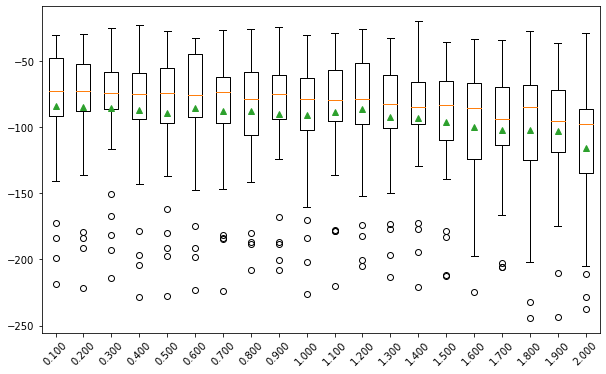

In [66]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in np.arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostRegressor(learning_rate=i)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_data(df_all1)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('Learning rate, %s:  𝛍 = %.3f ( 𝛔 = %.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45);

<Figure size 720x432 with 0 Axes>

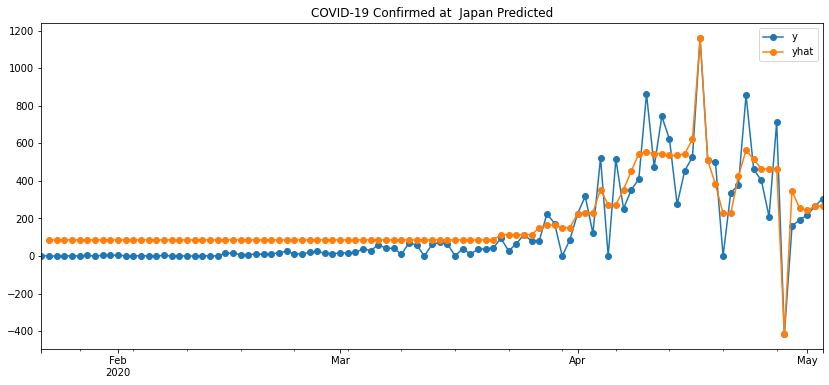

In [67]:
model.fit(X,y)
result_viz(df_all1,model)

Explore Number of Trees
---
An important hyperparameter for AdaBoost algorithm is the number of decision trees used in the ensemble.

Depth of Trees, 1 (-3.650): score (0.979)
Depth of Trees, 2 (-2.607): score (0.709)
Depth of Trees, 3 (-2.373): score (0.967)
Depth of Trees, 4 (-2.422): score (1.100)
Depth of Trees, 5 (-2.471): score (1.007)
Depth of Trees, 6 (-2.428): score (1.040)
Depth of Trees, 7 (-2.548): score (1.040)
Depth of Trees, 8 (-2.652): score (0.876)
Depth of Trees, 9 (-2.562): score (0.941)
Depth of Trees, 10 (-2.643): score (0.911)


''

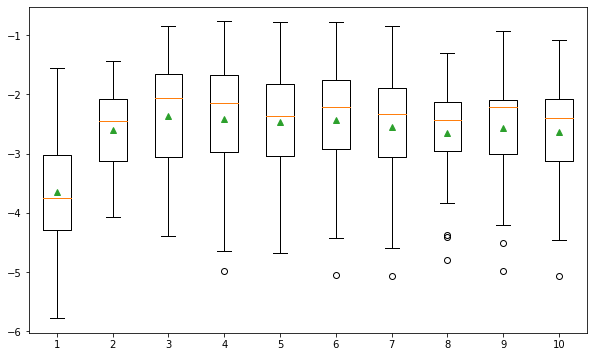

In [75]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=i))
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset(df_all1)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('Depth of Trees, %s (%.3f): score (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names, showmeans=True);
;

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,11):
		models[str(i)] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i))
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

In [ ]:
# load pycaret
from pycaret.regression import *

In [ ]:
exp1 = setup(df_all1, numeric_features=['dead'],target = 'confirmed')

Error Evaluation
---
1. Mean Absolute Error , MAE=$\displaystyle{\frac{1}{n}\sum_{i=1}^n|y_i-\hat y_i}|$
2. MAPE=$\displaystyle{\frac{100\%}{n}\sum_{i=1}^n\left|\frac{y_i-\hat y_i}{y_i}\right|}$
3. Mean Square Error, MSE = $\displaystyle{\frac{1}{n}\sum_{i=1}^n(y_i-\hat y_i})^2$
4. Root Mean Square Error, RMSE = $\displaystyle{\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat y_i})^2}$
5. Root Mean Square Logarithmic Error, RMSLE = $\displaystyle{
     \sqrt{\frac{1}{n}\sum_{i=1}^n \left(\log(1+y_i)-\log(1+\hat y_i)\right)^2}}$
- $R^2=1-\displaystyle{\frac{\text{MSE}}{\frac{1}{n}\sum_i(y-\bar y_i)^2}} $     

In [ ]:
compare_models()

In [ ]:
adaboost = create_model('ada')

In [ ]:
adaboost.base_estimator_

In [ ]:
adaboost = create_model('ada')
plot_model(adaboost, plot = 'MSE')

In [ ]:
evaluate_model(adaboost)

In [ ]:
predict_ada=predict_model(adaboost, data = df_all1)
predict_ada.tail()

In [ ]:
catboost = create_model('catboost')
plot_model(catboost, plot = 'MSE')


In [ ]:
predict_cat=predict_model(catboost, data = df_all1)
predict_cat.tail()

In [ ]:
xgboost = create_model('xgboost')
plot_model(xgboost, plot = 'MSE')


In [ ]:
predict_xgb=predict_model(xgboost, data = df_all1)
predict_xgb.tail()

In [ ]:
lightgbm= create_model('lightgbm')
plot_model(lightgbm, plot = 'MSE')


In [ ]:
predict_lgb=predict_model(lightgbm, data = df_all1)
predict_lgb.tail()

In [ ]:
dt = create_model('dt')

In [ ]:
# parameter tuning 
dt2 = create_model('dt', fold = 5)

In [ ]:
predict_at=predict_model(dt, data = df_all1)
predict_at.tail()

In [ ]:
predict_at2=predict_model(dt2, data = df_all1)
predict_at2.tail()

In [ ]:

#tuned_knn with default n_iter (10)
plot_model(dt, plot = 'parameter')

Ensemble Model
---

In [ ]:
dt_bagged = ensemble_model(dt)

In [ ]:

boosted_dt = ensemble_model(dt, method = 'Boosting')

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

In [ ]:
blend_all = blend_models()

In [ ]:
blend_specific = blend_models(estimator_list = [dt,adaboost,catboost,xgboost])


In [ ]:
stack_specific = stack_models([dt,adaboost,catboost,xgboost])


In [ ]:
predict_model(stack_specific);

In [ ]:
save_model(xgboost, model_name = 'xgb_for_deployment')

In [ ]:
# creating a decision tree model
dt = create_model('dt')# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

In [ ]:
predict_dt=predict_model(dt_bagged, data = df_all1)
predict_dt.tail()

In [ ]:
save_model(xgboost, model_name = 'xgb_for_deployment')
#save_experiment(experiment_name = 'my_first_experiment')

saved_final_xgboost = load_model('xgb_for_deployment)